1. Загрузка файла
Сначала необходимо загрузить файл с данными в формате .xls. Для этого можно воспользоваться библиотекой pandas и openpyxl.

In [1]:
# Установите необходимые библиотеки, если они не установлены
!pip install pandas openpyxl

# Импортируем нужные библиотеки
import pandas as pd


In [2]:
# Загрузите файл с помощью pandas
df = pd.read_excel('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')  # Укажите путь к файлу
df.head()

,№,товар,выручка,1,2,3,4,Unnamed: 7
0,1,"Батончик ""Марс""",1927,514,510,431,472,0.080472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852,0.034890
2,24,Сахар песок фасованный,3858,948,998,962,950,0.024026
3,7,Ж.Р. Дирол,3286,804,788,831,863,0.040010
4,4,"Батончик ""Твикс""",2462,596,636,630,600,0.033177


In [5]:
df.drop(columns=["Unnamed: 7"], inplace=True)


KeyError: "['Unnamed: 7'] not found in axis"

In [6]:
df.to_csv("/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx", index=False)  # Замените на нужное имя файла
df.head()

,№,товар,выручка,1,2,3,4
0,1,"Батончик ""Марс""",1927,514,510,431,472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852
2,24,Сахар песок фасованный,3858,948,998,962,950
3,7,Ж.Р. Дирол,3286,804,788,831,863
4,4,"Батончик ""Твикс""",2462,596,636,630,600


2. Просмотр и подготовка данных
Посмотрите, какие данные содержатся в файле, чтобы понять структуру.

In [7]:
# Вывод первых строк для проверки
df.head()

,№,товар,выручка,1,2,3,4
0,1,"Батончик ""Марс""",1927,514,510,431,472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852
2,24,Сахар песок фасованный,3858,948,998,962,950
3,7,Ж.Р. Дирол,3286,804,788,831,863
4,4,"Батончик ""Твикс""",2462,596,636,630,600


In [8]:


# Проверим наличие пропусков в данных
df.isnull().sum()


,0
№,0
товар,0
выручка,0
1,0
2,0
3,0
4,0


Если данные имеют пропуски или требуют фильтрации, приведите их в нужный вид. Например:

In [ ]:
# Заполняем пропуски или удаляем строки с пропусками
df.dropna(inplace=True)  # если хотите удалить строки с пропусками


3. Выбор данных для ABC-анализа

Для проведения ABC-анализа обычно используются данные о продажах (выручка или количество проданных товаров). Выберите нужные столбцы для анализа:

In [9]:
# Предположим, что у вас есть столбец 'product_name' (название товара) и 'sales' (продажи)
sales_data = df[['товар', 'выручка']]


4. Проведение ABC-анализа
ABC-анализ делит товары на три категории: A (самые важные), B (средней важности), и C (наименее важные) на основе их вклада в общие продажи.

In [10]:
# Рассчитываем общий объем продаж
total_sales = sales_data['выручка'].sum()

# Сортируем товары по продажам
sales_data = sales_data.sort_values(by='выручка', ascending=False)

# Рассчитываем долю продаж каждого товара
sales_data['cumulative_share'] = sales_data['выручка'].cumsum() / total_sales

# Определяем категории A, B и C
sales_data['category'] = pd.cut(sales_data['cumulative_share'],
                                bins=[0, 0.8, 0.95, 1],  # 80% для A, 15% для B, остальное для C
                                labels=['A', 'B', 'C'])


5. Построение графиков
Для визуализации можно использовать библиотеку matplotlib или seaborn.

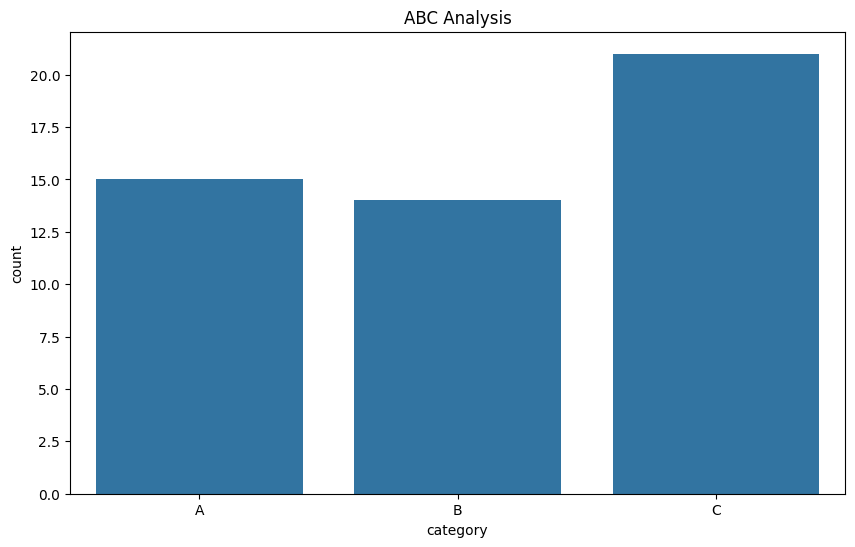

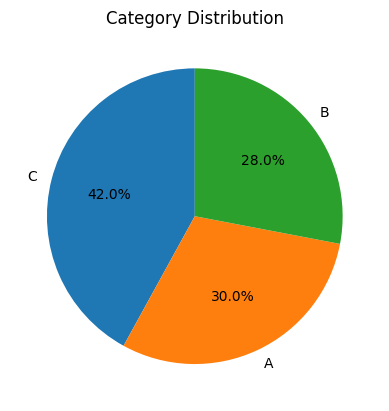

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение столбчатого графика продаж по категориям A, B, C
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=sales_data)
plt.title('ABC Analysis')
plt.show()

# Построение круговой диаграммы
category_counts = sales_data['category'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.ylabel('')
plt.show()


6. Графики по отдельным товарам или группам товаров
Если вы хотите построить графики для конкретных товаров или групп, можно фильтровать данные по ним.

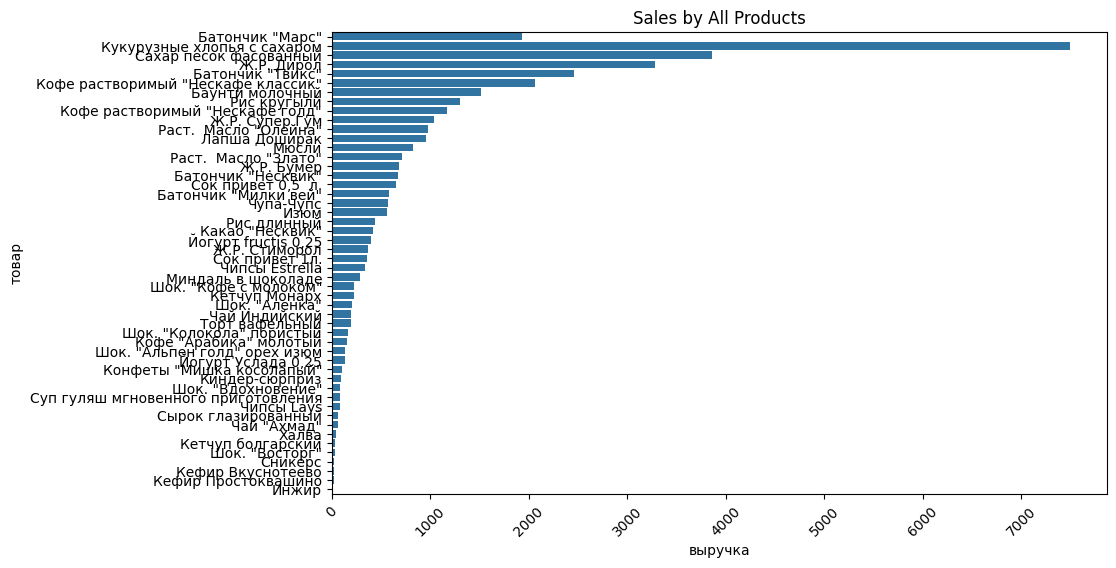

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, у вас есть DataFrame df с данными о продажах
sales_data = df[['товар', 'выручка']]

# Получаем все уникальные товары из столбца 'товар'
all_products = sales_data['товар'].unique()

# Фильтруем данные по всем товарам
product_sales = sales_data[sales_data['товар'].isin(all_products)]

# Строим график по всем товарам
plt.figure(figsize=(10, 6))
sns.barplot(y='товар', x='выручка', data=product_sales)
plt.title('Sales by All Products')
plt.xticks(rotation=45)
plt.show()

Загрузка данных:

Загружаем данные из файла CSV или Excel в DataFrame sales_data.

Получение всех уникальных товаров:

Используем метод unique() для столбца 'товар', чтобы получить все уникальные значения товаров.

all_products = sales_data['товар'].unique()

Фильтрация данных:

Используем метод isin() для фильтрации данных по всем товарам, полученным на предыдущем шаге.

product_sales = sales_data[sales_data['товар'].isin(all_products)]

Построение графика:

Строим график по всем товарам, используя seaborn.barplot().

sns.barplot(x='товар', y='выручка', data=product_sales)

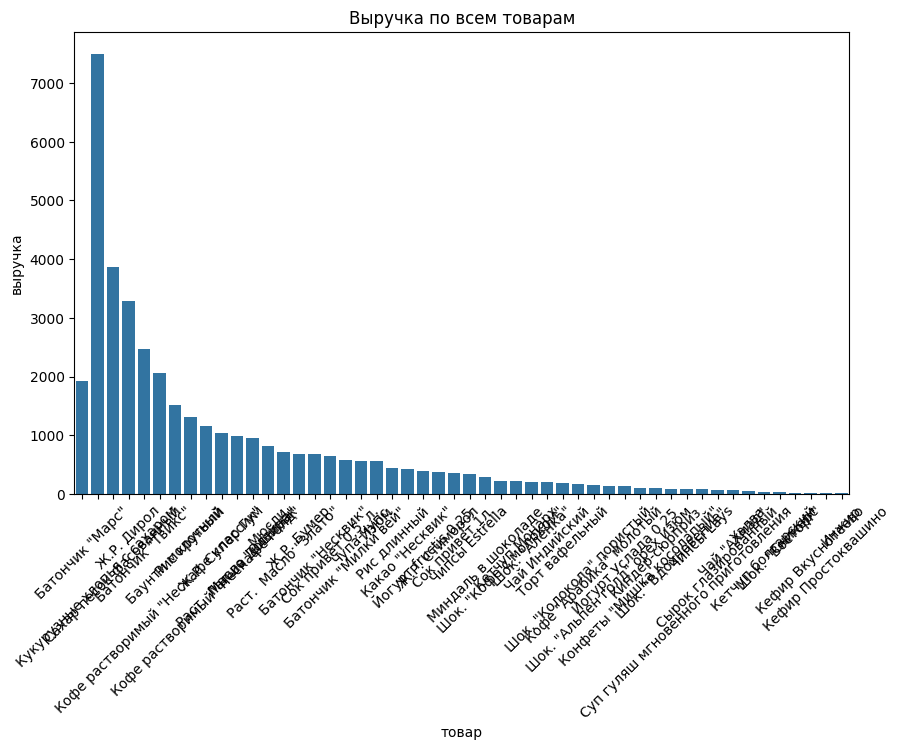

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузите ваш файл CSV в DataFrame (замените 'your_file.csv' на путь к вашему файлу)
#sales_data = pd.read_excel('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')  # Если у вас Excel, используйте pd.read_excel('your_file.xlsx')

# Получаем все уникальные товары из столбца 'товар'
all_products = sales_data['товар'].unique()

# Фильтруем данные по всем товарам
product_sales = sales_data[sales_data['товар'].isin(all_products)]

# Строим график по всем товарам
plt.figure(figsize=(10, 6))
sns.barplot(x='товар', y='выручка', data=product_sales)
plt.title('Выручка по всем товарам')
plt.xticks(rotation=45)
plt.show()

7. Вывод итогов анализа

После анализа вы сможете получить полезную информацию о том, какие товары приносят наибольшую долю выручки, и построить визуализации для отчетности.

Эти шаги помогут вам выполнить ABC-анализ и построить нужные графики для продаж в Google Colab.

Товары категории A: ['Кукурузные хлопья с сахаром', 'Сахар песок фасованный', 'Ж.Р. Дирол', 'Батончик "Твикс"', 'Кофе растворимый "Нескафе классик"', 'Батончик "Марс"', 'Баунти молочный', 'Рис кругылй', 'Кофе растворимый "Нескафе голд"', 'Ж.Р. Супер Гум', 'Раст.  Масло "Олейна"', 'Лапша Доширак', 'Мюсли', 'Раст.  Масло "Злато"', 'Ж.Р. Бумер']
Товары категории B: ['Батончик "Несквик"', 'Сок привет 0,5  л.', 'Батончик "Милки вей"', 'Чупа-Чупс', 'Изюм', 'Рис длинный', 'Какао "Несквик"', 'Йогурт fructis 0,25', 'Ж.Р. Стиморол', 'Сок привет 1л.', 'Чипсы Estrella', 'Миндаль в шоколаде', 'Шок. "Кофе с молоком"', 'Кетчуп Монарх']
Товары категории C: ['Шок. "Аленка"', 'Чай Индийский', 'Торт вафельный', 'Шок. "Колокола" пористый', 'Кофе "Арабика" молотый', 'Шок. "Альпен голд" орех изюм', 'Йогурт Услада 0,25', 'Конфеты "Мишка косолапый"', 'Киндер-сюрприз', 'Шок. "Вдохновение"', 'Суп гуляш мгновенного приготовления', 'Чипсы Lays', 'Сырок глазированный', 'Чай "Ахмад"', 'Халва', 'Кетчуп болгарский', 

<ipython-input-14-359a2f2b2401>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ABC категория', palette='viridis')


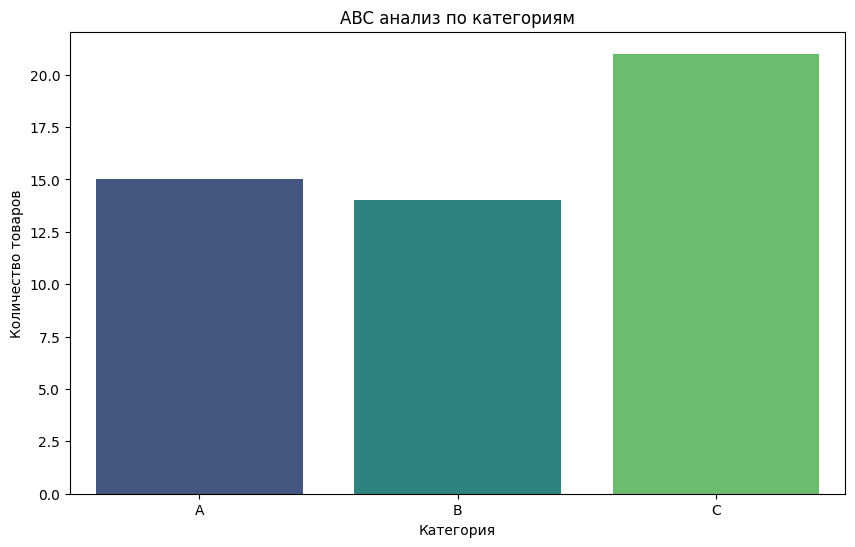

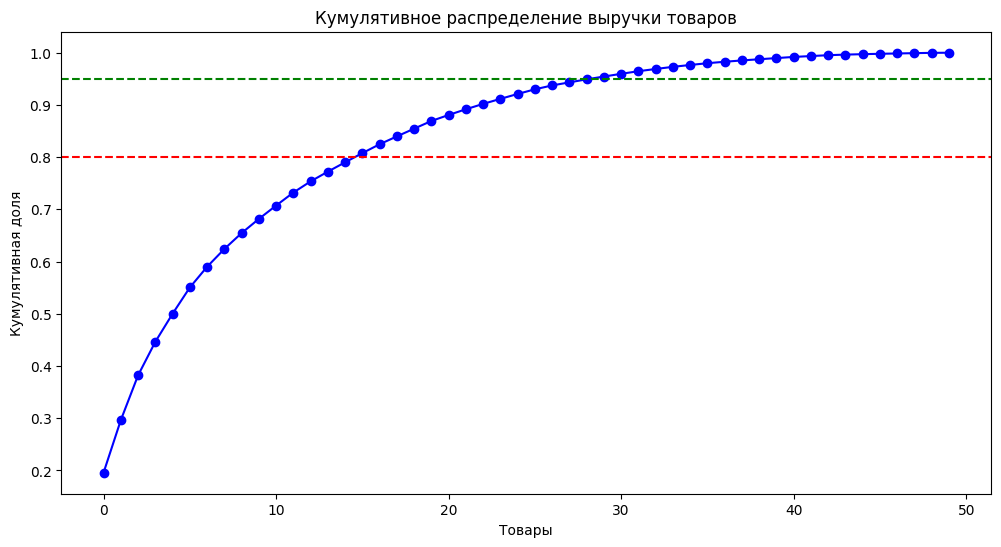

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')  # Замените на путь к вашему файлу

# Добавим столбец с общей выручкой по каждому товару
data['Общая выручка'] = data[['1', '2', '3', '4']].sum(axis=1)

# Сортируем по общей выручке и вычисляем кумулятивный процент
data = data.sort_values(by='Общая выручка', ascending=False)
data['Кумулятивная доля'] = data['Общая выручка'].cumsum() / data['Общая выручка'].sum()

# Применим ABC-классификацию
data['ABC категория'] = np.where(data['Кумулятивная доля'] <= 0.8, 'A',
                                 np.where(data['Кумулятивная доля'] <= 0.95, 'B', 'C'))

# Вывод списков товаров по категориям
category_a = data[data['ABC категория'] == 'A']['товар'].tolist()
category_b = data[data['ABC категория'] == 'B']['товар'].tolist()
category_c = data[data['ABC категория'] == 'C']['товар'].tolist()

print("Товары категории A:", category_a)
print("Товары категории B:", category_b)
print("Товары категории C:", category_c)

# Визуализация ABC-анализа
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ABC категория', palette='viridis')
plt.title('ABC анализ по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.show()

# График распределения кумулятивной доли
plt.figure(figsize=(12, 6))
plt.plot(data['Кумулятивная доля'].values, marker='o', linestyle='-', color='b')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.title('Кумулятивное распределение выручки товаров')
plt.xlabel('Товары')
plt.ylabel('Кумулятивная доля')
plt.show()



In [ ]:
data

,№,товар,выручка,1,2,3,4,Общая выручка,Кумулятивная доля,ABC категория
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852,7493,0.195563,A
2,24,Сахар песок фасованный,3858,948,998,962,950,3858,0.296255,A
3,7,Ж.Р. Дирол,3286,804,788,831,863,3286,0.382017,A
4,4,"Батончик ""Твикс""",2462,596,636,630,600,2462,0.446274,A
5,17,"Кофе растворимый ""Нескафе классик""",2060,512,515,505,528,2060,0.500039,A
0,1,"Батончик ""Марс""",1927,514,510,431,472,1927,0.550333,A
6,5,Баунти молочный,1519,367,341,411,400,1519,0.589978,A
7,23,Рис кругылй,1306,317,323,322,344,1306,0.624064,A
8,16,"Кофе растворимый ""Нескафе голд""",1166,292,275,304,295,1166,0.654496,A
9,9,Ж.Р. Супер Гум,1041,250,250,298,243,1041,0.681665,A


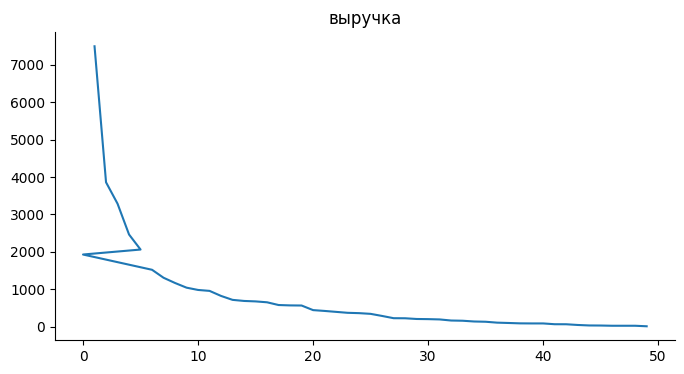

In [15]:
from matplotlib import pyplot as plt
data['выручка'].plot(kind='line', figsize=(8, 4), title='выручка')
plt.gca().spines[['top', 'right']].set_visible(False)

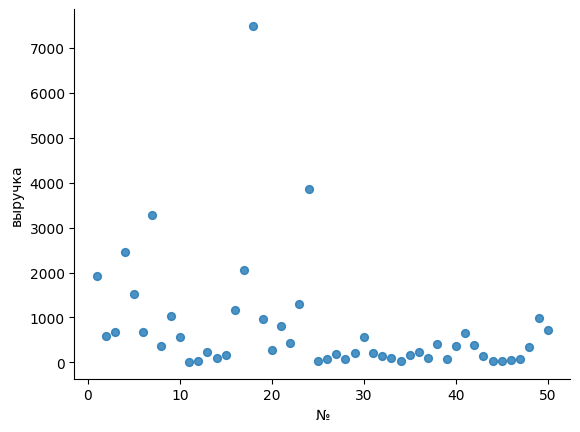

In [16]:
# @title № vs выручка

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='№', y='выручка', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-578aee74b38d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='№', y='ABC категория', inner='stick', palette='Dark2')


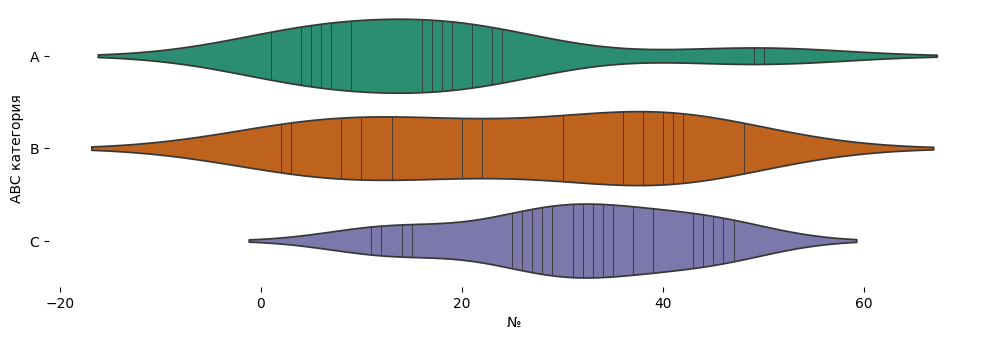

In [17]:
# @title ABC категория vs №

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['ABC категория'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='№', y='ABC категория', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data['ABC категория']

,ABC категория
1,A
2,A
3,A
4,A
5,A
0,A
6,A
7,A
8,A
9,A


Для проведения XYZ-анализа нам нужно оценить стабильность выручки по каждому товару. XYZ-анализ классифицирует товары в зависимости от степени вариации их выручки:

X — низкая вариация (стабильная выручка).
Y — средняя вариация (умеренно стабильная).
Z — высокая вариация (нестабильная выручка).
XYZ-анализ обычно основан на коэффициенте вариации (отношении стандартного отклонения к средней выручке).

Шаги для XYZ-анализа:
Рассчитать коэффициент вариации для каждого товара.
Классифицировать товары:
X: коэффициент вариации < 10%
Y: коэффициент вариации 10-25%
Z: коэффициент вариации > 25%
Добавим к коду выше блок для XYZ-анализа:

Объяснение:
Коэффициент вариации: Вычисляется как отношение стандартного отклонения к средней выручке. Чем ниже коэффициент, тем стабильнее выручка.
XYZ категория: На основе коэффициента вариации мы присваиваем каждому товару категорию X, Y или Z.
Вывод категорий: Списки товаров в каждой категории (X, Y, Z) выводятся в консоль.
Визуализация: Столбчатая диаграмма, которая показывает количество товаров в каждой категории XYZ.
Теперь ваш анализ будет включать и классификацию по стабильности выручки, что дает больше информации о поведении спроса на товары.

Товары категории X: ['Кукурузные хлопья с сахаром', 'Сахар песок фасованный', 'Ж.Р. Дирол', 'Батончик "Твикс"', 'Кофе растворимый "Нескафе классик"', 'Батончик "Марс"', 'Баунти молочный', 'Рис кругылй', 'Кофе растворимый "Нескафе голд"', 'Ж.Р. Супер Гум', 'Мюсли', 'Сок привет 0,5  л.', 'Чупа-Чупс', 'Изюм', 'Йогурт fructis 0,25', 'Ж.Р. Стиморол', 'Сок привет 1л.', 'Чипсы Estrella', 'Чай Индийский', 'Торт вафельный', 'Шок. "Колокола" пористый', 'Кофе "Арабика" молотый', 'Шок. "Альпен голд" орех изюм', 'Йогурт Услада 0,25', 'Конфеты "Мишка косолапый"', 'Шок. "Вдохновение"', 'Чипсы Lays']
Товары категории Y: ['Раст.  Масло "Олейна"', 'Лапша Доширак', 'Ж.Р. Бумер', 'Батончик "Несквик"', 'Миндаль в шоколаде', 'Шок. "Кофе с молоком"', 'Кетчуп Монарх', 'Шок. "Аленка"', 'Киндер-сюрприз', 'Сырок глазированный', 'Чай "Ахмад"', 'Кетчуп болгарский', 'Шок. "Восторг"']
Товары категории Z: ['Раст.  Масло "Злато"', 'Батончик "Милки вей"', 'Рис длинный', 'Какао "Несквик"', 'Суп гуляш мгновенного пригото

<ipython-input-18-54a48ac8afcc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='XYZ категория', palette='coolwarm')


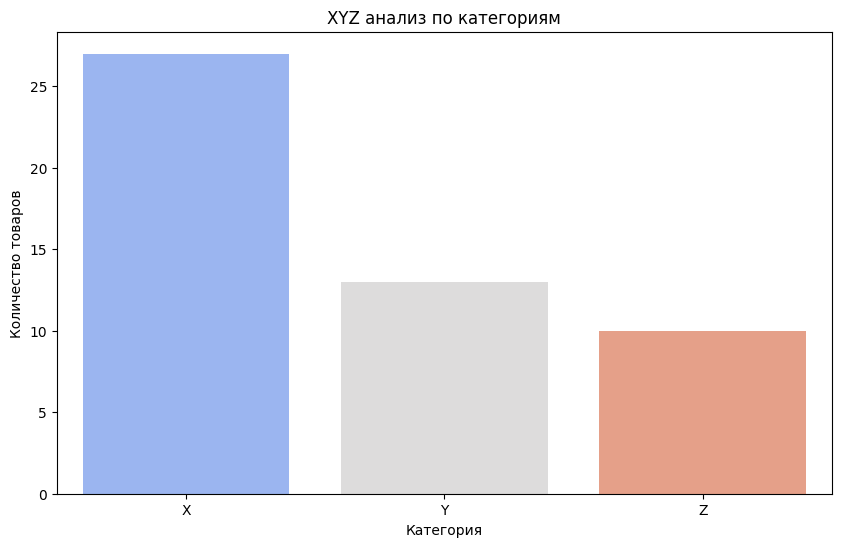

In [18]:
# Добавляем вычисление средней и стандартного отклонения по кварталам
data['Средняя выручка'] = data[['1', '2', '3', '4']].mean(axis=1)
data['Стандартное отклонение'] = data[['1', '2', '3', '4']].std(axis=1)

# Коэффициент вариации
data['Коэффициент вариации'] = data['Стандартное отклонение'] / data['Средняя выручка']

# Применим XYZ-классификацию
data['XYZ категория'] = np.where(data['Коэффициент вариации'] < 0.1, 'X',
                                 np.where(data['Коэффициент вариации'] < 0.25, 'Y', 'Z'))

# Вывод списков товаров по категориям XYZ
category_x = data[data['XYZ категория'] == 'X']['товар'].tolist()
category_y = data[data['XYZ категория'] == 'Y']['товар'].tolist()
category_z = data[data['XYZ категория'] == 'Z']['товар'].tolist()

print("Товары категории X:", category_x)
print("Товары категории Y:", category_y)
print("Товары категории Z:", category_z)

# Визуализация XYZ-анализа
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='XYZ категория', palette='coolwarm')
plt.title('XYZ анализ по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузите ваш файл CSV в DataFrame (замените 'your_file.csv' на путь к вашему файлу)
data = pd.read_csv('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')  # Если у вас Excel, используйте pd.read_excel('your_file.xlsx')

# Добавляем вычисление средней и стандартного отклонения по кварталам
data['Средняя выручка'] = data[['1', '2', '3', '4']].mean(axis=1)
data['Стандартное отклонение'] = data[['1', '2', '3', '4']].std(axis=1)

# Коэффициент вариации
data['Коэффициент вариации'] = data['Стандартное отклонение'] / data['Средняя выручка']

# Применим XYZ-классификацию
data['XYZ категория'] = np.where(data['Коэффициент вариации'] < 0.1, 'X',
                                 np.where(data['Коэффициент вариации'] < 0.25, 'Y', 'Z'))

# Вывод списков товаров по категориям XYZ
category_x = data[data['XYZ категория'] == 'X']['товар'].tolist()
category_y = data[data['XYZ категория'] == 'Y']['товар'].tolist()
category_z = data[data['XYZ категория'] == 'Z']['товар'].tolist()

print("Товары категории X:", category_x)
print("Товары категории Y:", category_y)
print("Товары категории Z:", category_z)

# Создаем DataFrame для сохранения списков товаров по категориям
result_df = pd.DataFrame({             # ошибка так как списки разной длины во фрейме надо одинаковые
    'X': category_x,
    'Y': category_y,
    'Z': category_z
})

# Сохраняем результаты в Excel файл
result_df.to_excel('xyz_categories.xlsx', index=False)

# Визуализация XYZ-анализа
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='XYZ категория', palette='coolwarm')
plt.title('XYZ анализ по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.show()

Товары категории X: ['Батончик "Марс"', 'Кукурузные хлопья с сахаром', 'Сахар песок фасованный', 'Ж.Р. Дирол', 'Батончик "Твикс"', 'Кофе растворимый "Нескафе классик"', 'Баунти молочный', 'Рис кругылй', 'Кофе растворимый "Нескафе голд"', 'Ж.Р. Супер Гум', 'Мюсли', 'Сок привет 0,5  л.', 'Чупа-Чупс', 'Изюм', 'Йогурт fructis 0,25', 'Ж.Р. Стиморол', 'Сок привет 1л.', 'Чипсы Estrella', 'Чай Индийский', 'Торт вафельный', 'Шок. "Колокола" пористый', 'Кофе "Арабика" молотый', 'Шок. "Альпен голд" орех изюм', 'Йогурт Услада 0,25', 'Конфеты "Мишка косолапый"', 'Шок. "Вдохновение"', 'Чипсы Lays']
Товары категории Y: ['Раст.  Масло "Олейна"', 'Лапша Доширак', 'Ж.Р. Бумер', 'Батончик "Несквик"', 'Миндаль в шоколаде', 'Шок. "Кофе с молоком"', 'Кетчуп Монарх', 'Шок. "Аленка"', 'Киндер-сюрприз', 'Сырок глазированный', 'Чай "Ахмад"', 'Кетчуп болгарский', 'Шок. "Восторг"']
Товары категории Z: ['Раст.  Масло "Злато"', 'Батончик "Милки вей"', 'Рис длинный', 'Какао "Несквик"', 'Суп гуляш мгновенного пригото

ValueError: All arrays must be of the same length

Вычисление средней и стандартного отклонения:

Вычисляем среднюю выручку и стандартное отклонение по кварталам.

Коэффициент вариации:

Вычисляем коэффициент вариации и применяем XYZ-классификацию.

Вывод списков товаров по категориям XYZ:

Создаем списки товаров для каждой категории XYZ.

Создание DataFrame для сохранения результатов:

Определяем максимальную длину списков и дополняем остальные списки None, чтобы все списки были одинаковой длины.

Создаем DataFrame result_df, который содержит списки товаров по категориям XYZ.

Сохранение результатов в Excel файл:

Сохраняем DataFrame result_df в Excel файл с помощью метода to_excel().

Визуализация XYZ-анализа:

Строим график с помощью seaborn.countplot().

Товары категории X: ['Батончик "Марс"', 'Кукурузные хлопья с сахаром', 'Сахар песок фасованный', 'Ж.Р. Дирол', 'Батончик "Твикс"', 'Кофе растворимый "Нескафе классик"', 'Баунти молочный', 'Рис кругылй', 'Кофе растворимый "Нескафе голд"', 'Ж.Р. Супер Гум', 'Мюсли', 'Сок привет 0,5  л.', 'Чупа-Чупс', 'Изюм', 'Йогурт fructis 0,25', 'Ж.Р. Стиморол', 'Сок привет 1л.', 'Чипсы Estrella', 'Чай Индийский', 'Торт вафельный', 'Шок. "Колокола" пористый', 'Кофе "Арабика" молотый', 'Шок. "Альпен голд" орех изюм', 'Йогурт Услада 0,25', 'Конфеты "Мишка косолапый"', 'Шок. "Вдохновение"', 'Чипсы Lays']
Товары категории Y: ['Раст.  Масло "Олейна"', 'Лапша Доширак', 'Ж.Р. Бумер', 'Батончик "Несквик"', 'Миндаль в шоколаде', 'Шок. "Кофе с молоком"', 'Кетчуп Монарх', 'Шок. "Аленка"', 'Киндер-сюрприз', 'Сырок глазированный', 'Чай "Ахмад"', 'Кетчуп болгарский', 'Шок. "Восторг"']
Товары категории Z: ['Раст.  Масло "Злато"', 'Батончик "Милки вей"', 'Рис длинный', 'Какао "Несквик"', 'Суп гуляш мгновенного пригото

<ipython-input-21-f766260db5aa>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='XYZ категория', palette='coolwarm')


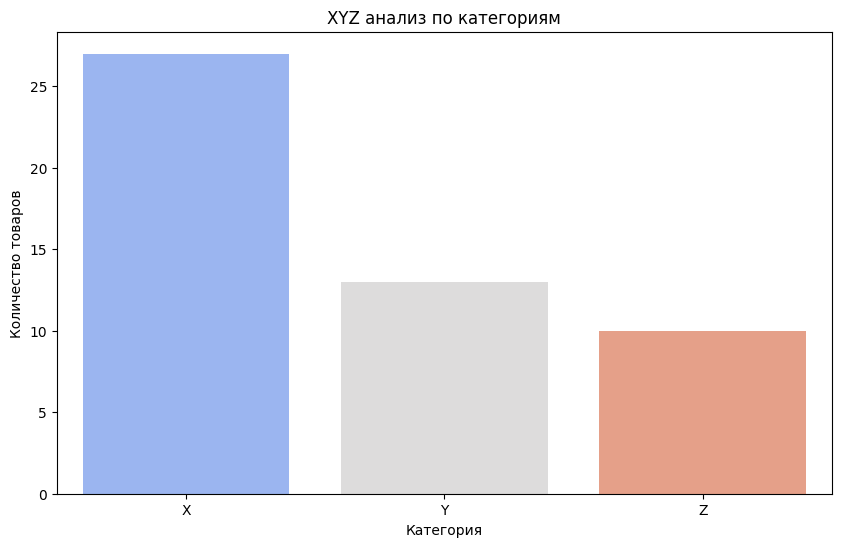

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузите ваш файл CSV в DataFrame (замените 'your_file.csv' на путь к вашему файлу)
data = pd.read_csv('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')  # Если у вас Excel, используйте pd.read_excel('your_file.xlsx')

# Добавляем вычисление средней и стандартного отклонения по кварталам
data['Средняя выручка'] = data[['1', '2', '3', '4']].mean(axis=1)
data['Стандартное отклонение'] = data[['1', '2', '3', '4']].std(axis=1)

# Коэффициент вариации
data['Коэффициент вариации'] = data['Стандартное отклонение'] / data['Средняя выручка']

# Применим XYZ-классификацию
data['XYZ категория'] = np.where(data['Коэффициент вариации'] < 0.1, 'X',
                                 np.where(data['Коэффициент вариации'] < 0.25, 'Y', 'Z'))

# Вывод списков товаров по категориям XYZ
category_x = data[data['XYZ категория'] == 'X']['товар'].tolist()
category_y = data[data['XYZ категория'] == 'Y']['товар'].tolist()
category_z = data[data['XYZ категория'] == 'Z']['товар'].tolist()

print("Товары категории X:", category_x)
print("Товары категории Y:", category_y)
print("Товары категории Z:", category_z)

# Создаем DataFrame для сохранения списков товаров по категориям
max_length = max(len(category_x), len(category_y), len(category_z))
category_x += [None] * (max_length - len(category_x))
category_y += [None] * (max_length - len(category_y))
category_z += [None] * (max_length - len(category_z))

result_df = pd.DataFrame({
    'X': category_x,
    'Y': category_y,
    'Z': category_z
})

# Сохраняем результаты в Excel файл
result_df.to_excel('xyz_categories.xlsx', index=False)

# Визуализация XYZ-анализа
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='XYZ категория', palette='coolwarm')
plt.title('XYZ анализ по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.show()

Если у вас есть данные по продажам товара за три месяца и вы хотите предсказать продажи на следующие три месяца, это задача временных рядов. Временные ряды — это специальный тип данных, где наблюдения упорядочены по времени, и предсказание на основе предыдущих значений является ключевым.

Для решения задачи временных рядов можно использовать различные методы, такие как:

Простая экстраполяция:

Использование простых методов, таких как скользящее среднее или экспоненциальное сглаживание.

Авторегрессионные модели:

Модели, которые используют предыдущие значения временного ряда для предсказания будущих значений (например, ARIMA, SARIMA).

Модели машинного обучения:

Использование моделей машинного обучения, таких как LSTM (Long Short-Term Memory) в нейронных сетях.

Пример с использованием модели ARIMA:
ARIMA (AutoRegressive Integrated Moving Average) — это популярная модель для анализа и предсказания временных рядов. Давайте рассмотрим пример с использованием библиотеки statsmodels.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Предсказанные продажи на следующие три месяца:
1900-04-01    152.217479
1900-05-01    130.549683
1900-06-01    151.681396
Freq: MS, Name: predicted_mean, dtype: float64


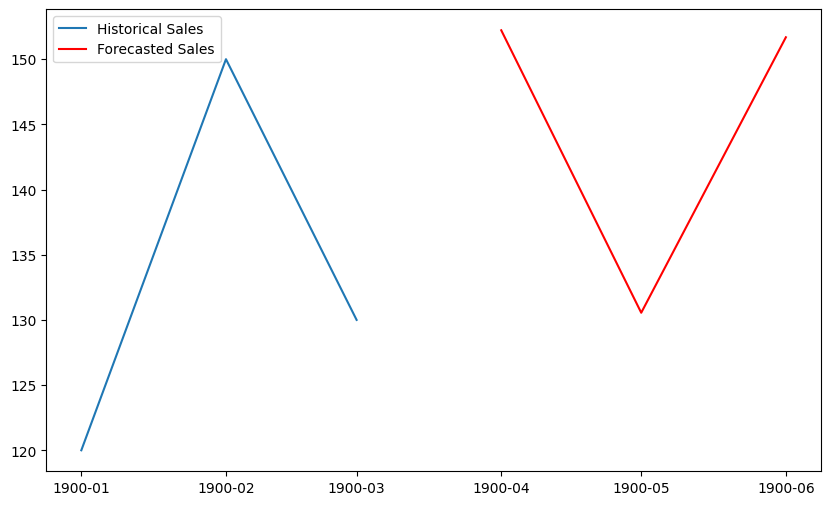

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Создаем DataFrame с данными по продажам за три месяца
data = {
    'Month': ['January', 'February', 'March'],
    'Sales': [120, 150, 130]
}
df = pd.DataFrame(data)

# Преобразуем данные в формат временного ряда
df['Month'] = pd.to_datetime(df['Month'], format='%B')
df.set_index('Month', inplace=True)

# Обучаем модель ARIMA
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Предсказываем продажи на следующие три месяца
forecast = model_fit.forecast(steps=3)

# Выводим результаты
print("Предсказанные продажи на следующие три месяца:")
print(forecast)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.show()

In [ ]:
data

{'Month': ['January', 'February', 'March'], 'Sales': [120, 150, 130]}

Создание DataFrame с данными по продажам:

Создаем DataFrame df с данными по продажам за три месяца.

Преобразование данных в формат временного ряда:

Преобразуем колонку Month в формат даты и устанавливаем ее как индекс.

Обучение модели ARIMA:

Обучаем модель ARIMA на данных по продажам. Параметры order=(1, 1, 1) можно настроить в зависимости от характеристик ваших данных.

Предсказание продаж на следующие три месяца:

Используем метод forecast для предсказания продаж на следующие три месяца.

Вывод результатов:

Выводим предсказанные продажи на следующие три месяца.

Визуализация результатов:

Строим график исторических и предсказанных продаж.

Пример вывода:
Предположим, у вас есть данные по продажам за три месяца. Вот как может выглядеть вывод предсказаний на следующие три месяца:

In [1]:
import pandas as pd

# Загрузка Excel файла
dar = pd.read_excel('/content/ABC АНАЛИЗ ФАЙЛ РАСЧЕТОВ = исходник для колаб.xlsx')

# Сохранение в CSV
dar.to_csv('/content/data.csv', index=False)

In [6]:
import pandas as pd

# Загрузка данных из CSV файла
dar = pd.read_csv('/content/data.csv')

dar.drop(columns=["Unnamed: 7"], inplace=True)
# Вывод первых 4 строк для проверки
print(dar.head(10))


    №                               товар  выручка     1     2     3     4
0   1                     Батончик "Марс"     1927   514   510   431   472
1  18         Кукурузные хлопья с сахаром     7493  1968  1818  1855  1852
2  24              Сахар песок фасованный     3858   948   998   962   950
3   7                          Ж.Р. Дирол     3286   804   788   831   863
4   4                    Батончик "Твикс"     2462   596   636   630   600
5  17  Кофе растворимый "Нескафе классик"     2060   512   515   505   528
6   5                     Баунти молочный     1519   367   341   411   400
7  23                         Рис кругылй     1306   317   323   322   344
8  16     Кофе растворимый "Нескафе голд"     1166   292   275   304   295
9   9                      Ж.Р. Супер Гум     1041   250   250   298   243


,№,товар,выручка,1,2,3,4
0,1,"Батончик ""Марс""",1927,514,510,431,472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852
2,24,Сахар песок фасованный,3858,948,998,962,950
3,7,Ж.Р. Дирол,3286,804,788,831,863
4,4,"Батончик ""Твикс""",2462,596,636,630,600
5,17,"Кофе растворимый ""Нескафе классик""",2060,512,515,505,528
6,5,Баунти молочный,1519,367,341,411,400
7,23,Рис кругылй,1306,317,323,322,344
8,16,"Кофе растворимый ""Нескафе голд""",1166,292,275,304,295
9,9,Ж.Р. Супер Гум,1041,250,250,298,243


In [7]:
dar

,№,товар,выручка,1,2,3,4
0,1,"Батончик ""Марс""",1927,514,510,431,472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852
2,24,Сахар песок фасованный,3858,948,998,962,950
3,7,Ж.Р. Дирол,3286,804,788,831,863
4,4,"Батончик ""Твикс""",2462,596,636,630,600
5,17,"Кофе растворимый ""Нескафе классик""",2060,512,515,505,528
6,5,Баунти молочный,1519,367,341,411,400
7,23,Рис кругылй,1306,317,323,322,344
8,16,"Кофе растворимый ""Нескафе голд""",1166,292,275,304,295
9,9,Ж.Р. Супер Гум,1041,250,250,298,243


In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dar)

https://docs.google.com/spreadsheets/d/1XgzX4YE_dVdsYvPCwIaPYv5fwYORTJi2u1sUKxfAcAI#gid=0


Анализ и предсказание продаж с использованием ARIMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Функция для предсказания продаж на основе ARIMA
def predict_sales(data, product_name, months_to_predict):
    # Выбор данных для конкретного товара
    product_data = data[data['товар'] == product_name]

    # Извлечение временного ряда
    time_series = product_data[['1', '2', '3', '4']].values.flatten()

    # Подгонка модели ARIMA
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Предсказание продаж на следующие месяцы
    forecast = model_fit.forecast(steps=months_to_predict)

    return forecast

# Пример предсказания для товара "Батончик "Марс""
product_name = 'Батончик "Марс"'
months_to_predict = 4
forecast = predict_sales(dar, product_name, months_to_predict)

print(f"Предсказание продаж для {product_name} на следующие {months_to_predict} месяцев: {forecast}")

Предсказание продаж для Батончик "Марс" на следующие 4 месяцев: [479.95113154 482.46360924 483.25752695 483.50839697]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Функция для оценки ошибки модели
def evaluate_model(data, product_name):
    # Выбор данных для конкретного товара
    product_data = data[data['товар'] == product_name]

    # Извлечение временного ряда
    time_series = product_data[['1', '2', '3', '4']].values.flatten()

    # Подгонка модели ARIMA
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Предсказание на тестовом наборе (последние 2 месяца)
    forecast = model_fit.forecast(steps=2)

    # Фактические значения
    actual = product_data[['3', '4']].values.flatten()[-2:]

    # Вычисление ошибок
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)

    return mse, mae

# Пример оценки модели для товара "Батончик "Марс""
product_name = 'Батончик "Марс"'
mse, mae = evaluate_model(dar, product_name)

print(f"MSE для {product_name}: {mse}")
print(f"MAE для {product_name}: {mae}")

MSE для Батончик "Марс": 1252.8501987717157
MAE для Батончик "Марс": 29.707370389452734


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Стандартизация данных

In [11]:
# Оценка модели до стандартизации
product_name = 'Батончик "Марс"'
mse_before, mae_before = evaluate_model(dar, product_name)

print(f"MSE до стандартизации: {mse_before}")
print(f"MAE до стандартизации: {mae_before}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE до стандартизации: 1252.8501987717157
MAE до стандартизации: 29.707370389452734


In [12]:
# Пример стандартизации данных с использованием MinMaxScaler
#scaled_dar = scale_data(dar, scaler_type='minmax')

#print(scaled_dar.head(4))

NameError: name 'scale_data' is not defined

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Функция для стандартизации данных
def scale_data(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Неизвестный тип скалера. Используйте 'minmax' или 'standard'.")

    # Применение скалера к данным
    scaled_data = scaler.fit_transform(data[['1', '2', '3', '4']])

    # Обновление данных в DataFrame
    data[['1', '2', '3', '4']] = scaled_data

    return data

# Пример стандартизации данных с использованием MinMaxScaler
scaled_dar = scale_data(dar, scaler_type='minmax')

print(scaled_dar.head(4))

    №                        товар  выручка         1         2         3  \
0   1              Батончик "Марс"     1927  0.260051  0.280132  0.231102   
1  18  Кукурузные хлопья с сахаром     7493  1.000000  1.000000  1.000000   
2  24       Сахар песок фасованный     3858  0.480916  0.548707  0.517819   
3   7                   Ж.Р. Дирол     3286  0.407634  0.433132  0.447084   

          4  
0  0.254054  
1  1.000000  
2  0.512432  
3  0.465405  


In [14]:
# Пример повторного обучения модели после стандартизации
product_name = 'Батончик "Марс"'
months_to_predict = 4
forecast = predict_sales(scaled_dar, product_name, months_to_predict)

print(f"Предсказание продаж для {product_name} на следующие {months_to_predict} месяцев после стандартизации: {forecast}")

# Оценка модели после стандартизации
mse, mae = evaluate_model(scaled_dar, product_name)

print(f"MSE для {product_name} после стандартизации: {mse}")
print(f"MAE для {product_name} после стандартизации: {mae}")

Предсказание продаж для Батончик "Марс" на следующие 4 месяцев после стандартизации: [0.24853242 0.25055399 0.24981386 0.25008484]
MSE для Батончик "Марс" после стандартизации: 0.0001580435052649012
MAE для Батончик "Марс" после стандартизации: 0.010465484583413467


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [15]:
# Пример повторного обучения модели после стандартизации
product_name = 'Батончик "Марс"'
months_to_predict = 4
forecast = predict_sales(scaled_dar, product_name, months_to_predict)

print(f"Предсказание продаж для {product_name} на следующие {months_to_predict} месяцев после стандартизации: {forecast}")

# Оценка модели после стандартизации
mse, mae = evaluate_model(scaled_dar, product_name)

print(f"MSE после стандартизации: {mse}")
print(f"MAE после стандартизации: {mae}")

Предсказание продаж для Батончик "Марс" на следующие 4 месяцев после стандартизации: [0.24853242 0.25055399 0.24981386 0.25008484]
MSE после стандартизации: 0.0001580435052649012
MAE после стандартизации: 0.010465484583413467


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [16]:
# Сравнение ошибок до и после стандартизации
print(f"MSE до стандартизации: {mse_before}")
print(f"MSE после стандартизации: {mse}")

print(f"MAE до стандартизации: {mae_before}")
print(f"MAE после стандартизации: {mae}")

MSE до стандартизации: 1252.8501987717157
MSE после стандартизации: 0.0001580435052649012
MAE до стандартизации: 29.707370389452734
MAE после стандартизации: 0.010465484583413467


ВЕСЬ КОД СРАЗУ В ОДНОМ, КОТОРЫЙ ВЫШЕ

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Загрузка данных из CSV файла
dar = pd.read_csv('/content/data.csv')

# Функция для предсказания продаж на основе ARIMA
def predict_sales(data, product_name, months_to_predict):
    product_data = data[data['товар'] == product_name]
    time_series = product_data[['1', '2', '3', '4']].values.flatten()
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=months_to_predict)
    return forecast

# Функция для оценки ошибки модели
def evaluate_model(data, product_name):
    product_data = data[data['товар'] == product_name]
    time_series = product_data[['1', '2', '3', '4']].values.flatten()
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=2)
    actual = product_data[['3', '4']].values.flatten()[-2:]
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    return mse, mae

# Функция для стандартизации данных
def scale_data(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Неизвестный тип скалера. Используйте 'minmax' или 'standard'.")
    scaled_data = scaler.fit_transform(data[['1', '2', '3', '4']])
    data[['1', '2', '3', '4']] = scaled_data
    return data

# Оценка модели до стандартизации
product_name = 'Батончик "Марс"'
mse_before, mae_before = evaluate_model(dar, product_name)

print(f"MSE до стандартизации: {mse_before}")
print(f"MAE до стандартизации: {mae_before}")

# Стандартизация данных
scaled_dar = scale_data(dar, scaler_type='minmax')

print(scaled_dar.head(4))

# Обучение модели после стандартизации
months_to_predict = 4
forecast = predict_sales(scaled_dar, product_name, months_to_predict)

print(f"Предсказание продаж для {product_name} на следующие {months_to_predict} месяцев после стандартизации: {forecast}")

# Оценка модели после стандартизации
mse, mae = evaluate_model(scaled_dar, product_name)

print(f"MSE после стандартизации: {mse}")
print(f"MAE после стандартизации: {mae}")

# Сравнение ошибок до и после стандартизации
print(f"MSE до стандартизации: {mse_before}")
print(f"MSE после стандартизации: {mse}")

print(f"MAE до стандартизации: {mae_before}")
print(f"MAE после стандартизации: {mae}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE до стандартизации: 1252.8501987717157
MAE до стандартизации: 29.707370389452734
    №                        товар  выручка         1         2         3  \
0   1              Батончик "Марс"     1927  0.260051  0.280132  0.231102   
1  18  Кукурузные хлопья с сахаром     7493  1.000000  1.000000  1.000000   
2  24       Сахар песок фасованный     3858  0.480916  0.548707  0.517819   
3   7                   Ж.Р. Дирол     3286  0.407634  0.433132  0.447084   

          4  
0  0.254054  
1  1.000000  
2  0.512432  
3  0.465405  
Предсказание продаж для Батончик "Марс" на следующие 4 месяцев после стандартизации: [0.24853242 0.25055399 0.24981386 0.25008484]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE после стандартизации: 0.0001580435052649012
MAE после стандартизации: 0.010465484583413467
MSE до стандартизации: 1252.8501987717157
MSE после стандартизации: 0.0001580435052649012
MAE до стандартизации: 29.707370389452734
MAE после стандартизации: 0.010465484583413467


In [17]:
import pandas as pd

# Загрузка данных из CSV файла
dar = pd.read_csv('/content/data.csv')

# Проверка данных
print(dar.head())
dar

    №                        товар  выручка     1     2     3     4  \
0   1              Батончик "Марс"     1927   514   510   431   472   
1  18  Кукурузные хлопья с сахаром     7493  1968  1818  1855  1852   
2  24       Сахар песок фасованный     3858   948   998   962   950   
3   7                   Ж.Р. Дирол     3286   804   788   831   863   
4   4             Батончик "Твикс"     2462   596   636   630   600   

   Unnamed: 7  
0    0.080472  
1    0.034890  
2    0.024026  
3    0.040010  
4    0.033177  


,№,товар,выручка,1,2,3,4,Unnamed: 7
0,1,"Батончик ""Марс""",1927,514,510,431,472,0.080472
1,18,Кукурузные хлопья с сахаром,7493,1968,1818,1855,1852,0.034890
2,24,Сахар песок фасованный,3858,948,998,962,950,0.024026
3,7,Ж.Р. Дирол,3286,804,788,831,863,0.040010
4,4,"Батончик ""Твикс""",2462,596,636,630,600,0.033177
5,17,"Кофе растворимый ""Нескафе классик""",2060,512,515,505,528,0.018692
6,5,Баунти молочный,1519,367,341,411,400,0.083974
7,23,Рис кругылй,1306,317,323,322,344,0.036626
8,16,"Кофе растворимый ""Нескафе голд""",1166,292,275,304,295,0.041593
9,9,Ж.Р. Супер Гум,1041,250,250,298,243,0.097530


Проверка и корректировка колонки "выручка"

In [18]:
# Проверка суммы столбцов '1', '2', '3', '4'
dar['выручка_проверка'] = dar[['1', '2', '3', '4']].sum(axis=1)

# Сравнение с исходной колонкой "выручка"
print(dar[['выручка', 'выручка_проверка']].head())

# Если есть расхождения, исправьте их
dar['выручка'] = dar['выручка_проверка']
dar.drop(columns=['выручка_проверка'], inplace=True)

   выручка  выручка_проверка
0     1927              1927
1     7493              7493
2     3858              3858
3     3286              3286
4     2462              2462


 Функция для предсказания продаж с использованием ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Функция для предсказания продаж на основе ARIMA
def predict_sales(data, product_name, months_to_predict):
    product_data = data[data['товар'] == product_name]
    time_series = product_data[['1', '2', '3', '4']].values.flatten()
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=months_to_predict)
    return forecast

Обучение модели и предсказание продаж

In [21]:
# Создание нового DataFrame для хранения предсказаний
predicted_dar = dar.copy()

# Предсказание продаж для каждого товара
for product_name in dar['товар'].unique():
    forecast = predict_sales(dar, product_name, 4)
    predicted_dar.loc[predicted_dar['товар'] == product_name, ['5', '6', '7', '8']] = forecast

# Сохранение предсказанных данных в новый CSV файл
predicted_dar.to_csv('/content/predicted_data.csv', index=False)

print(predicted_dar.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

    №                        товар  выручка     1     2     3     4  \
0   1              Батончик "Марс"     1927   514   510   431   472   
1  18  Кукурузные хлопья с сахаром     7493  1968  1818  1855  1852   
2  24       Сахар песок фасованный     3858   948   998   962   950   
3   7                   Ж.Р. Дирол     3286   804   788   831   863   
4   4             Батончик "Твикс"     2462   596   636   630   600   

   Unnamed: 7            5            6            7            8  
0    0.080472   479.951132   482.463609   483.257527   483.508397  
1    0.034890  1867.754312  1860.132835  1863.819883  1862.036197  
2    0.024026   969.435911   965.163879   966.102876   965.896483  
3    0.040010   860.195445   861.315796   860.868243   861.047029  
4    0.033177   616.000906   615.629587   615.638204   615.638004  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 Оценка ошибки модели

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Функция для оценки ошибки модели
def evaluate_model(data, product_name):
    product_data = data[data['товар'] == product_name]
    time_series = product_data[['1', '2', '3', '4']].values.flatten()
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=2)
    actual = product_data[['3', '4']].values.flatten()[-2:]
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    return mse, mae

# Оценка модели для каждого товара
mse_list = []
mae_list = []

for product_name in dar['товар'].unique():
    mse, mae = evaluate_model(dar, product_name)
    mse_list.append(mse)
    mae_list.append(mae)
    print(f"Товар: {product_name}, MSE: {mse}, MAE: {mae}")

# Средние значения ошибок
avg_mse = sum(mse_list) / len(mse_list)
avg_mae = sum(mae_list) / len(mae_list)

print(f"Среднее MSE: {avg_mse}")
print(f"Среднее MAE: {avg_mae}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Батончик "Марс", MSE: 1252.8501987717157, MAE: 29.707370389452734
Товар: Кукурузные хлопья с сахаром, MSE: 114.40773698292416, MAE: 10.443573362892948
Товар: Сахар песок фасованный, MSE: 142.61799873515153, MAE: 11.299895042462651


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Ж.Р. Дирол, MSE: 427.6052812873969, MAE: 15.439824777082265
Товар: Батончик "Твикс", MSE: 220.1293160683401, MAE: 14.814340643760545
Товар: Кофе растворимый "Нескафе классик", MSE: 25.3230638509987, MAE: 4.2742147368996655


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Баунти молочный, MSE: 492.0562709331972, MAE: 21.89617350792699
Товар: Рис кругылй, MSE: 136.22541414487256, MAE: 8.253569894145585


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Кофе растворимый "Нескафе голд", MSE: 28.062068613417367, MAE: 3.7467716987910364
Товар: Ж.Р. Супер Гум, MSE: 560.4728566197763, MAE: 22.897807464617642
Товар: Раст.  Масло "Олейна", MSE: 319.47068442114846, MAE: 17.873243191254176


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Лапша Доширак, MSE: 374.0423649886134, MAE: 19.155238758664368
Товар: Мюсли, MSE: 128.1195767859932, MAE: 9.813540163898779
Товар: Раст.  Масло "Злато", MSE: 16577.788392350474, MAE: 116.15981705313405


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Ж.Р. Бумер, MSE: 116.36879487842405, MAE: 8.877821882429316
Товар: Батончик "Несквик", MSE: 450.2561446532645, MAE: 21.215898183287038


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

Товар: Сок привет 0,5  л., MSE: 0.009045327318018319, MAE: 0.06732070722677008
Товар: Батончик "Милки вей", MSE: 3022.969190383252, MAE: 43.54880840679402
Товар: Чупа-Чупс, MSE: 4.565896320763102, MAE: 1.8031162764387574


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Изюм, MSE: 532.6980929598199, MAE: 17.684094838462464
Товар: Рис длинный, MSE: 1129.4952248647398, MAE: 23.770960413285735


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Какао "Несквик", MSE: 40.475005355894595, MAE: 4.500006974904373
Товар: Йогурт fructis 0,25, MSE: 21.43528080764394, MAE: 4.629624497927949
Товар: Ж.Р. Стиморол, MSE: 21.209157260801902, MAE: 4.322340211965411
Товар: Сок привет 1л., MSE: 1.2840715140463304, MAE: 1.128882092774333
Товар: Чипсы Estrella, MSE: 17.674627031973287, MAE: 3.0106486670241424


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization f

Товар: Миндаль в шоколаде, MSE: 666.7262303576763, MAE: 25.206957552860178
Товар: Шок. "Кофе с молоком", MSE: 70.11038007156888, MAE: 7.261170421266801
Товар: Кетчуп Монарх, MSE: 46.04282811728554, MAE: 6.17811285442783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Шок. "Аленка", MSE: 0.028431023488817448, MAE: 0.11936509152354446
Товар: Чай Индийский, MSE: 0.9009379255788584, MAE: 0.7460153204306899
Товар: Торт вафельный, MSE: 8.28449524790281, MAE: 2.481846009050951
Товар: Шок. "Колокола" пористый, MSE: 17.41737358969418, MAE: 3.007076366946748
Товар: Кофе "Арабика" молотый, MSE: 2.2441426886581577, MAE: 1.1031529126813453


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Шок. "Альпен голд" орех изюм, MSE: 2.079615090569728, MAE: 1.1650710170369365
Товар: Йогурт Услада 0,25, MSE: 3.447785479050819, MAE: 1.5184254624507147


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Конфеты "Мишка косолапый", MSE: 0.0753804614998899, MAE: 0.237301615634669
Товар: Киндер-сюрприз, MSE: 0.12487942789196807, MAE: 0.24991077186903787
Товар: Шок. "Вдохновение", MSE: 0.3112892026377377, MAE: 0.44584699598824606


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

Товар: Суп гуляш мгновенного приготовления, MSE: 0.10513032697934185, MAE: 0.22944761522293966
Товар: Чипсы Lays, MSE: 2.5585024092413193, MAE: 1.2499433689374033
Товар: Сырок глазированный, MSE: 2.4305495628191047, MAE: 1.3559885200257646
Товар: Чай "Ахмад", MSE: 6.308335546612277, MAE: 2.2513776071993377
Товар: Халва, MSE: 8.154373051230907, MAE: 2.6658305546650434


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Кетчуп болгарский, MSE: 0.2414560359725697, MAE: 0.4804523973509123
Товар: Шок. "Восторг", MSE: 2.7095183734402544, MAE: 1.4984346714336518


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

Товар: Сникерс, MSE: 0.6802248187023119, MAE: 0.58329238856069
Товар: Кефир Вкуснотеево, MSE: 0.9254129316682438, MAE: 0.7420177018210623
Товар: Кефир Простоквашино, MSE: 1.4682689775206155, MAE: 1.113368298945674
Товар: Инжир, MSE: 0.23673240961354214, MAE: 0.383697277468962
Среднее MSE: 540.0244805807852
Среднее MAE: 10.05218013262606


Стандартизация данных

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Функция для стандартизации данных
def scale_data(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Неизвестный тип скалера. Используйте 'minmax' или 'standard'.")
    scaled_data = scaler.fit_transform(data[['1', '2', '3', '4']])
    data[['1', '2', '3', '4']] = scaled_data
    return data

# Стандартизация данных
scaled_dar = scale_data(dar, scaler_type='minmax')

print(scaled_dar.head())

    №                        товар  выручка         1         2         3  \
0   1              Батончик "Марс"     1927  0.260051  0.280132  0.231102   
1  18  Кукурузные хлопья с сахаром     7493  1.000000  1.000000  1.000000   
2  24       Сахар песок фасованный     3858  0.480916  0.548707  0.517819   
3   7                   Ж.Р. Дирол     3286  0.407634  0.433132  0.447084   
4   4             Батончик "Твикс"     2462  0.301781  0.349477  0.338553   

          4  Unnamed: 7  
0  0.254054    0.080472  
1  1.000000    0.034890  
2  0.512432    0.024026  
3  0.465405    0.040010  
4  0.323243    0.033177  


Обучение модели после стандартизации и предсказание продаж

In [24]:
# Создание нового DataFrame для хранения предсказаний после стандартизации
scaled_predicted_dar = scaled_dar.copy()

# Предсказание продаж для каждого товара после стандартизации
for product_name in scaled_dar['товар'].unique():
    forecast = predict_sales(scaled_dar, product_name, 4)
    scaled_predicted_dar.loc[scaled_predicted_dar['товар'] == product_name, ['5', '6', '7', '8']] = forecast

# Сохранение предсказанных данных в новый CSV файл
scaled_predicted_dar.to_csv('/content/scaled_predicted_data.csv', index=False)

print(scaled_predicted_dar.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

    №                        товар  выручка         1         2         3  \
0   1              Батончик "Марс"     1927  0.260051  0.280132  0.231102   
1  18  Кукурузные хлопья с сахаром     7493  1.000000  1.000000  1.000000   
2  24       Сахар песок фасованный     3858  0.480916  0.548707  0.517819   
3   7                   Ж.Р. Дирол     3286  0.407634  0.433132  0.447084   
4   4             Батончик "Твикс"     2462  0.301781  0.349477  0.338553   

          4  Unnamed: 7         5         6         7         8  
0  0.254054    0.080472  0.248532  0.250554  0.249814  0.250085  
1  1.000000    0.034890  1.000000  1.000000  1.000000  1.000000  
2  0.512432    0.024026  0.523363  0.516721  0.520757  0.518304  
3  0.465405    0.040010  0.485574  0.501784  0.514812  0.525283  
4  0.323243    0.033177  0.331893  0.329634  0.330224  0.330070  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Оценка модели после стандартизации

In [25]:
# Оценка модели для каждого товара после стандартизации
scaled_mse_list = []
scaled_mae_list = []

for product_name in scaled_dar['товар'].unique():
    mse, mae = evaluate_model(scaled_dar, product_name)
    scaled_mse_list.append(mse)
    scaled_mae_list.append(mae)
    print(f"Товар: {product_name}, MSE после стандартизации: {mse}, MAE после стандартизации: {mae}")

# Средние значения ошибок после стандартизации
avg_scaled_mse = sum(scaled_mse_list) / len(scaled_mse_list)
avg_scaled_mae = sum(scaled_mae_list) / len(scaled_mae_list)

print(f"Среднее MSE после стандартизации: {avg_scaled_mse}")
print(f"Среднее MAE после стандартизации: {avg_scaled_mae}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Товар: Батончик "Марс", MSE после стандартизации: 0.0001580435052649012, MAE после стандартизации: 0.010465484583413467
Товар: Кукурузные хлопья с сахаром, MSE после стандартизации: 0.0, MAE после стандартизации: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Сахар песок фасованный, MSE после стандартизации: 2.4564092404420213e-05, MAE после стандартизации: 0.0049163022032674975


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Ж.Р. Дирол, MSE после стандартизации: 0.001402409432126724, MAE после стандартизации: 0.037433875179662734


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estim

Товар: Батончик "Твикс", MSE после стандартизации: 4.259788343399119e-05, MAE после стандартизации: 0.006525317887562471
Товар: Кофе растворимый "Нескафе классик", MSE после стандартизации: 1.1246327464571801e-05, MAE после стандартизации: 0.0030914459055467747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Баунти молочный, MSE после стандартизации: 1.1916665834947002e-05, MAE после стандартизации: 0.0025781316867024423
Товар: Рис кругылй, MSE после стандартизации: 6.635442712903162e-06, MAE после стандартизации: 0.002161004411041792
Товар: Кофе растворимый "Нескафе голд", MSE после стандартизации: 8.605282592029226e-06, MAE после стандартизации: 0.002074309730697013


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

Товар: Ж.Р. Супер Гум, MSE после стандартизации: 0.00024968027345993293, MAE после стандартизации: 0.01440844712115906


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Товар: Раст.  Масло "Олейна", MSE после стандартизации: 8.40473897560878e-05, MAE после стандартизации: 0.008978649791159601
Товар: Лапша Доширак, MSE после стандартизации: 9.157660250524215e-05, MAE после стандартизации: 0.009509746402891046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Мюсли, MSE после стандартизации: 1.8659335999070437e-05, MAE после стандартизации: 0.0038406065039174875


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Раст.  Масло "Злато", MSE после стандартизации: 0.005417926882842553, MAE после стандартизации: 0.06709204790649066
Товар: Ж.Р. Бумер, MSE после стандартизации: 9.92798129765495e-06, MAE после стандартизации: 0.0024513805511402684
Товар: Батончик "Несквик", MSE после стандартизации: 0.00014207281867895701, MAE после стандартизации: 0.01190975769883465


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Сок привет 0,5  л., MSE после стандартизации: 1.1374909721934637e-05, MAE после стандартизации: 0.0023848578599415873
Товар: Батончик "Милки вей", MSE после стандартизации: 0.0005016651533648668, MAE после стандартизации: 0.01620329420587619


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Товар: Чупа-Чупс, MSE после стандартизации: 9.851553883296644e-07, MAE после стандартизации: 0.000988013275874923
Товар: Изюм, MSE после стандартизации: 9.01619906173135e-05, MAE после стандартизации: 0.006714332554373807


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Рис длинный, MSE после стандартизации: 0.0002316252300075501, MAE после стандартизации: 0.011325074820158178
Товар: Какао "Несквик", MSE после стандартизации: 0.00020034128202137423, MAE после стандартизации: 0.011314529290612139


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Йогурт fructis 0,25, MSE после стандартизации: 6.230186735989088e-06, MAE после стандартизации: 0.0023098206404147115
Товар: Ж.Р. Стиморол, MSE после стандартизации: 2.930992326583947e-06, MAE после стандартизации: 0.0016188180099438558


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Сок привет 1л., MSE после стандартизации: 1.717948739434044e-07, MAE после стандартизации: 0.0004105548037098561


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Чипсы Estrella, MSE после стандартизации: 2.108551827138546e-06, MAE после стандартизации: 0.0013773267745418281


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Товар: Миндаль в шоколаде, MSE после стандартизации: 0.00017596523865388158, MAE после стандартизации: 0.012765711266479126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Шок. "Кофе с молоком", MSE после стандартизации: 1.807426676730666e-05, MAE после стандартизации: 0.0030938681981441986
Товар: Кетчуп Монарх, MSE после стандартизации: 5.038268274209739e-05, MAE после стандартизации: 0.006490129298439914


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

Товар: Шок. "Аленка", MSE после стандартизации: 7.045860088208957e-06, MAE после стандартизации: 0.0018770065952829068
Товар: Чай Индийский, MSE после стандартизации: 3.768600159581568e-07, MAE после стандартизации: 0.0005136697390406095
Товар: Торт вафельный, MSE после стандартизации: 1.2895388256358793e-06, MAE после стандартизации: 0.0010378789930649557
Товар: Шок. "Колокола" пористый, MSE после стандартизации: 3.0642653132868137e-06, MAE после стандартизации: 0.00155121972647973
Товар: Кофе "Арабика" молотый, MSE после стандартизации: 1.3495035413738563e-07, MAE после стандартизации: 0.00025976300272437074
Товар: Шок. "Альпен голд" орех изюм, MSE после стандартизации: 7.081378043083268e-06, MAE после стандартизации: 0.0018816764929019134


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

Товар: Йогурт Услада 0,25, MSE после стандартизации: 2.371588934074353e-06, MAE после стандартизации: 0.0010889615315491808
Товар: Конфеты "Мишка косолапый", MSE после стандартизации: 5.686960655377651e-07, MAE после стандартизации: 0.0005332438269795891


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Товар: Киндер-сюрприз, MSE после стандартизации: 5.880943719270156e-07, MAE после стандартизации: 0.0005879828769528792
Товар: Шок. "Вдохновение", MSE после стандартизации: 6.150418516802742e-11, MAE после стандартизации: 5.5455023055739e-06
Товар: Суп гуляш мгновенного приготовления, MSE после стандартизации: 3.4973255430842903e-06, MAE после стандартизации: 0.0016914856640564513
Товар: Чипсы Lays, MSE после стандартизации: 7.208618050582375e-07, MAE после стандартизации: 0.0007402533094648198


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for

Товар: Сырок глазированный, MSE после стандартизации: 4.907470021878004e-07, MAE после стандартизации: 0.0006907590909685036
Товар: Чай "Ахмад", MSE после стандартизации: 1.413972062240402e-07, MAE после стандартизации: 0.0002658922421340986
Товар: Халва, MSE после стандартизации: 2.2753679908676556e-06, MAE после стандартизации: 0.0013986253883666701


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estim

Товар: Кетчуп болгарский, MSE после стандартизации: 1.4420496784116314e-07, MAE после стандартизации: 0.0002685190590158192
Товар: Шок. "Восторг", MSE после стандартизации: 1.30915464625966e-06, MAE после стандартизации: 0.0008090595995563567


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estim

Товар: Сникерс, MSE после стандартизации: 2.5045816763424144e-07, MAE после стандартизации: 0.0003719532751599484
Товар: Кефир Вкуснотеево, MSE после стандартизации: 5.868986333893821e-07, MAE после стандартизации: 0.0005417112332144619
Товар: Кефир Простоквашино, MSE после стандартизации: 1.4514608058953606e-07, MAE после стандартизации: 0.0002693946646417783
Товар: Инжир, MSE после стандартизации: 0.0, MAE после стандартизации: 0.0
Среднее MSE после стандартизации: 0.0001800802041396294
Среднее MAE после стандартизации: 0.005616348807517157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Сравнение ошибок до и после стандартизации

In [26]:
# Сравнение ошибок до и после стандартизации
print(f"Среднее MSE до стандартизации: {avg_mse}")
print(f"Среднее MSE после стандартизации: {avg_scaled_mse}")

print(f"Среднее MAE до стандартизации: {avg_mae}")
print(f"Среднее MAE после стандартизации: {avg_scaled_mae}")

Среднее MSE до стандартизации: 540.0244805807852
Среднее MSE после стандартизации: 0.0001800802041396294
Среднее MAE до стандартизации: 10.05218013262606
Среднее MAE после стандартизации: 0.005616348807517157


    №                        товар  выручка     1     2     3     4  \
0   1              Батончик "Марс"     1927   514   510   431   472   
1  18  Кукурузные хлопья с сахаром     7493  1968  1818  1855  1852   
2  24       Сахар песок фасованный     3858   948   998   962   950   
3   7                   Ж.Р. Дирол     3286   804   788   831   863   
4   4             Батончик "Твикс"     2462   596   636   630   600   

   Unnamed: 7            5            6            7            8  
0    0.080472   479.951132   482.463609   483.257527   483.508397  
1    0.034890  1867.754312  1860.132835  1863.819883  1862.036197  
2    0.024026   969.435911   965.163879   966.102876   965.896483  
3    0.040010   860.195445   861.315796   860.868243   861.047029  
4    0.033177   616.000906   615.629587   615.638204   615.638004  


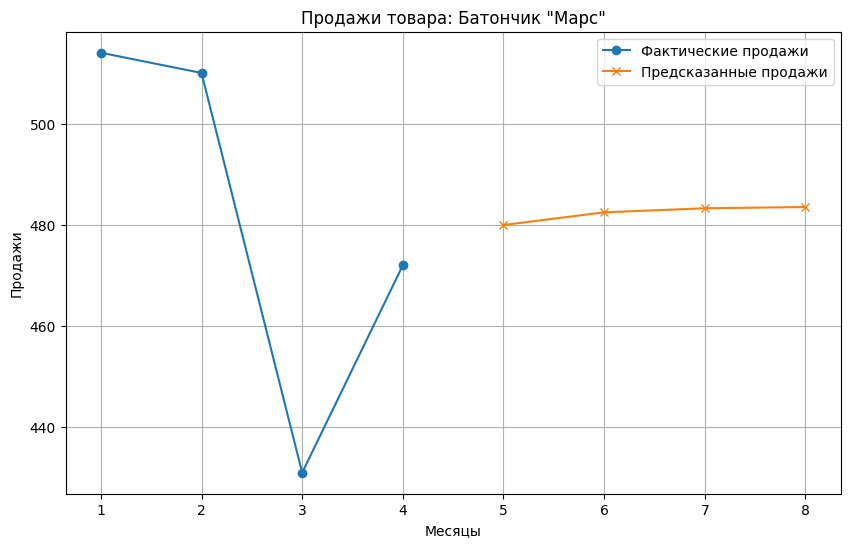

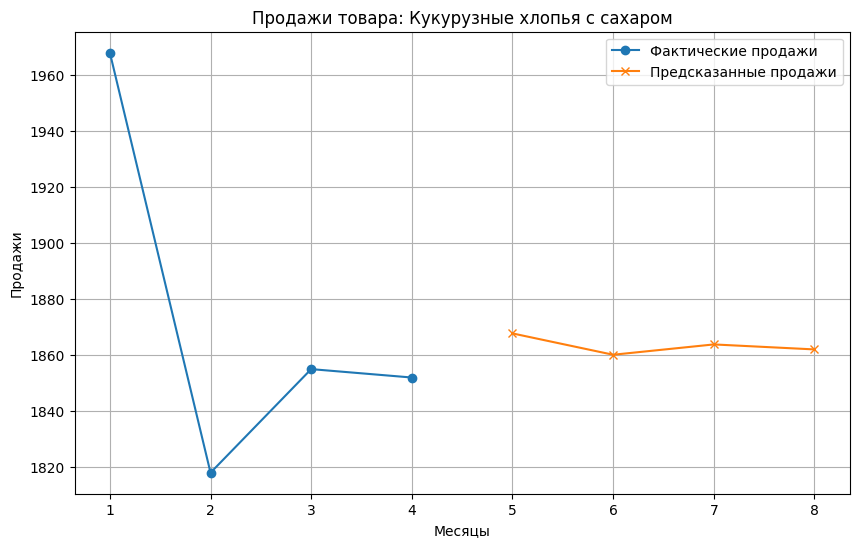

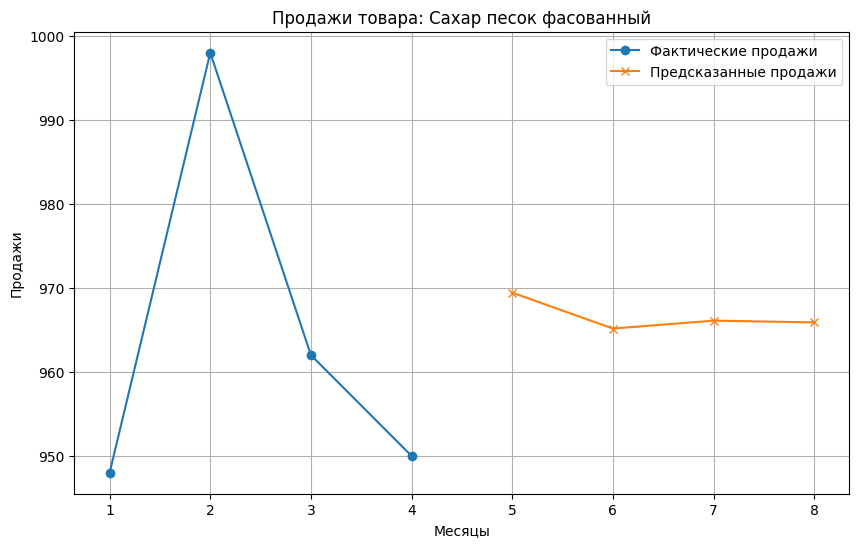

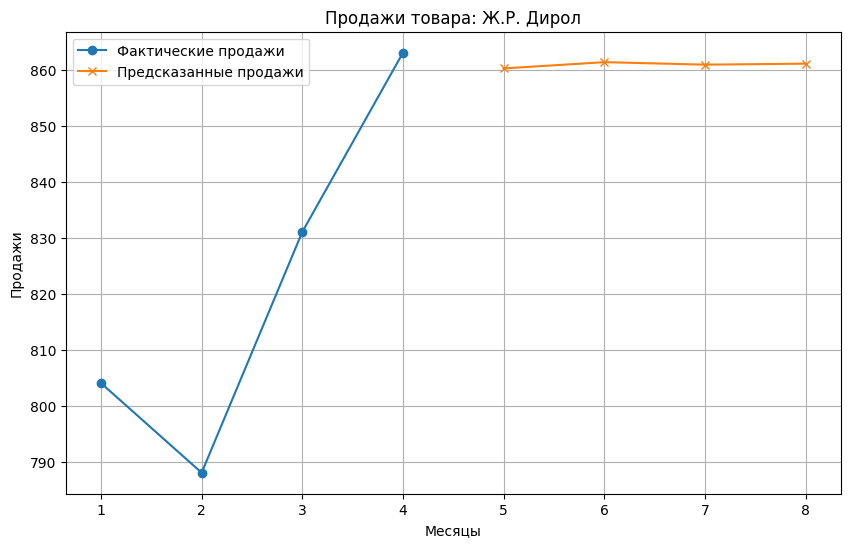

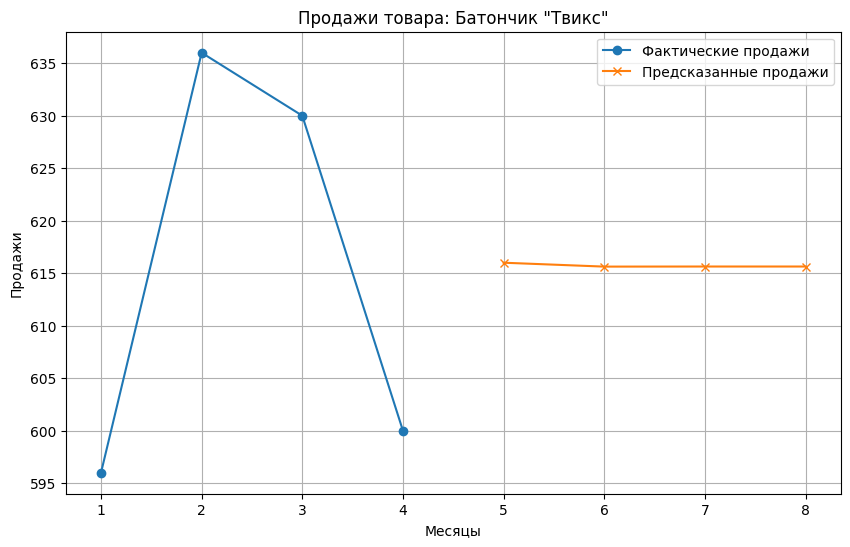

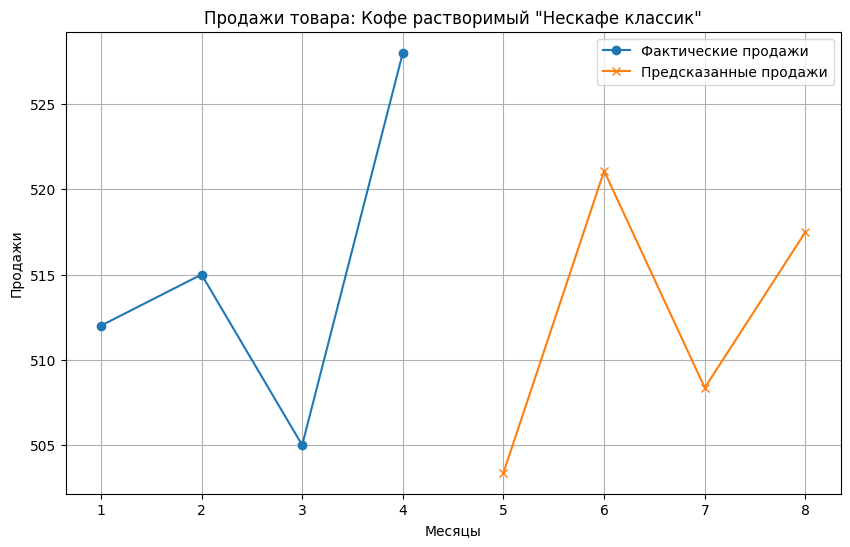

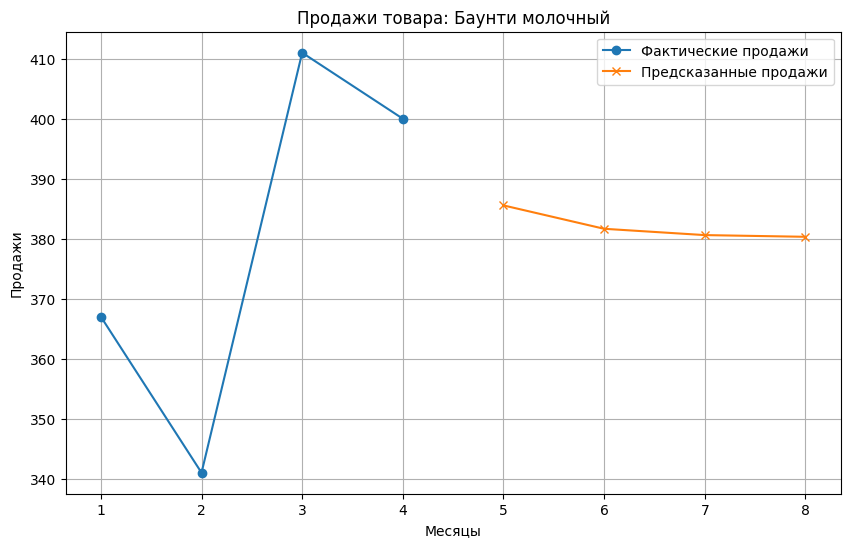

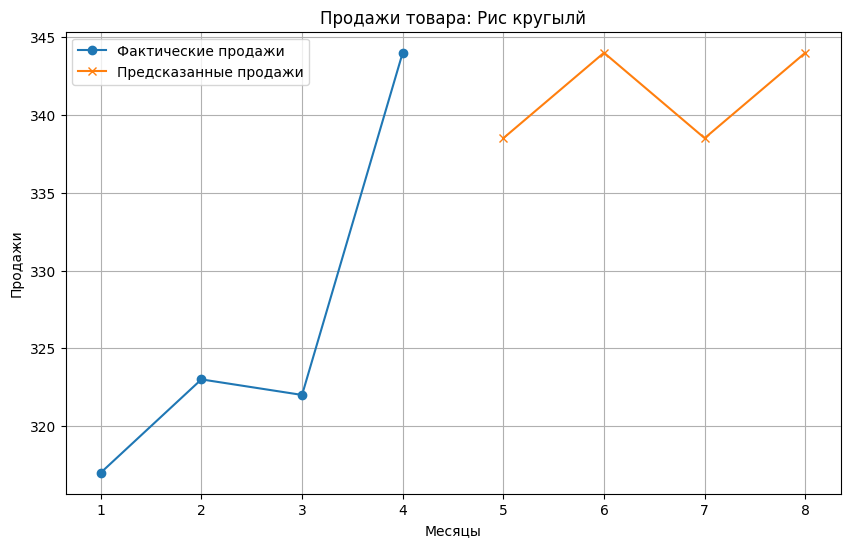

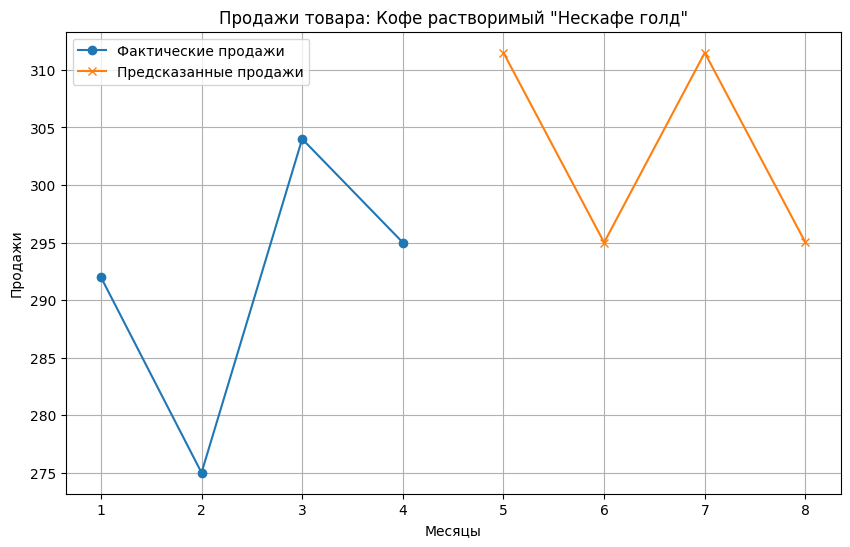

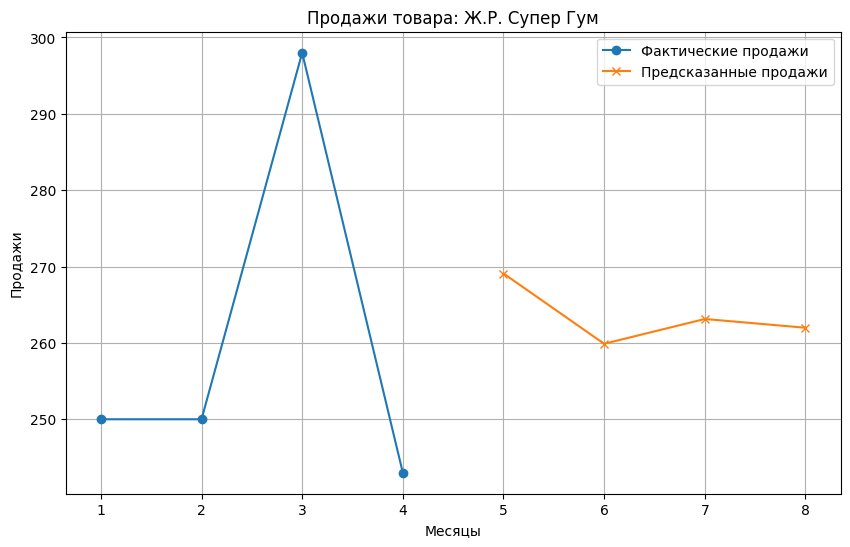

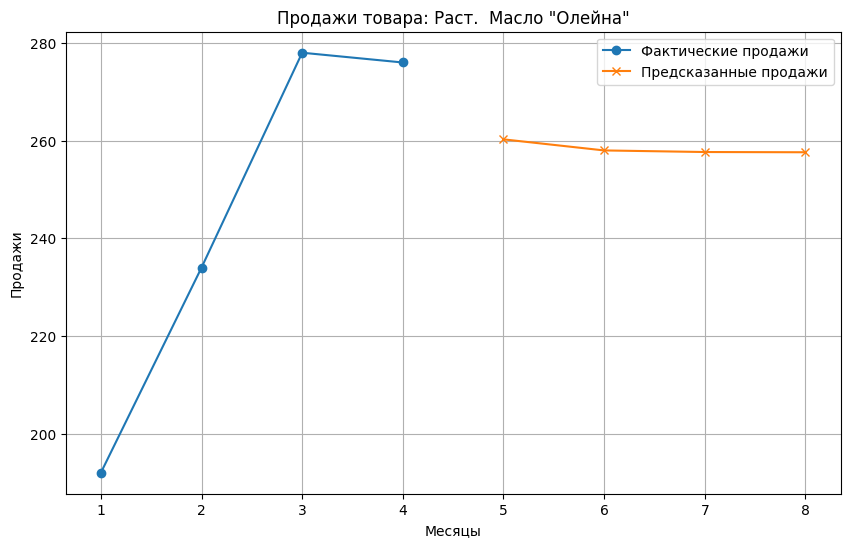

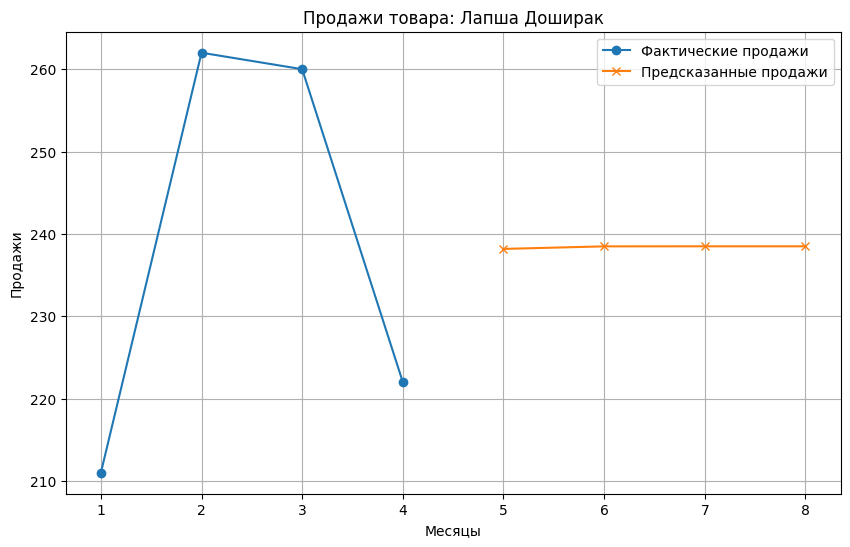

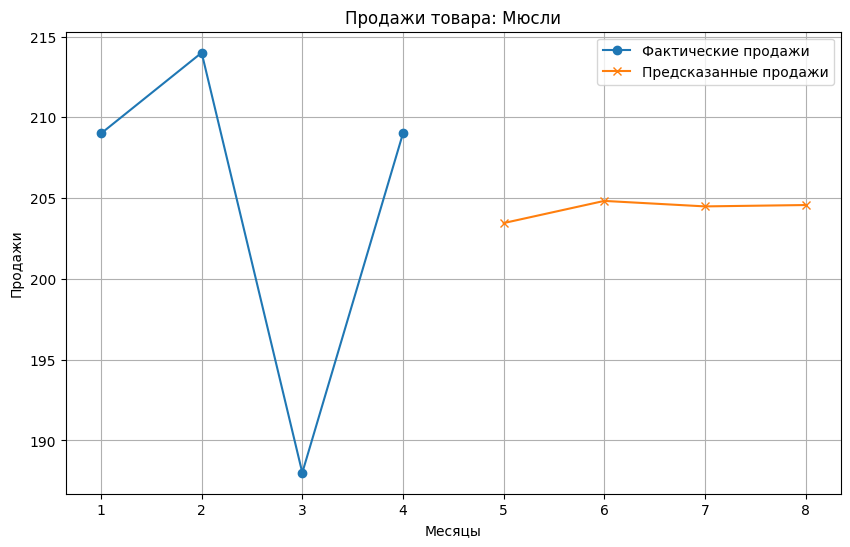

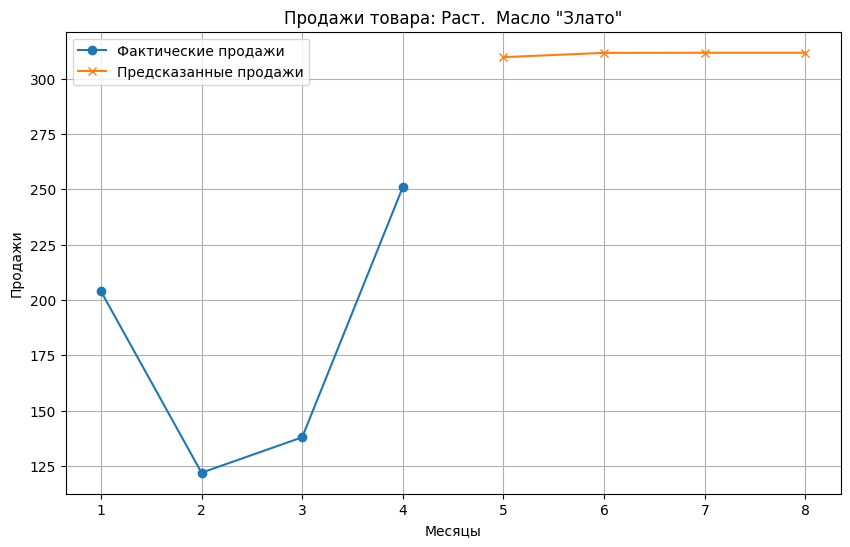

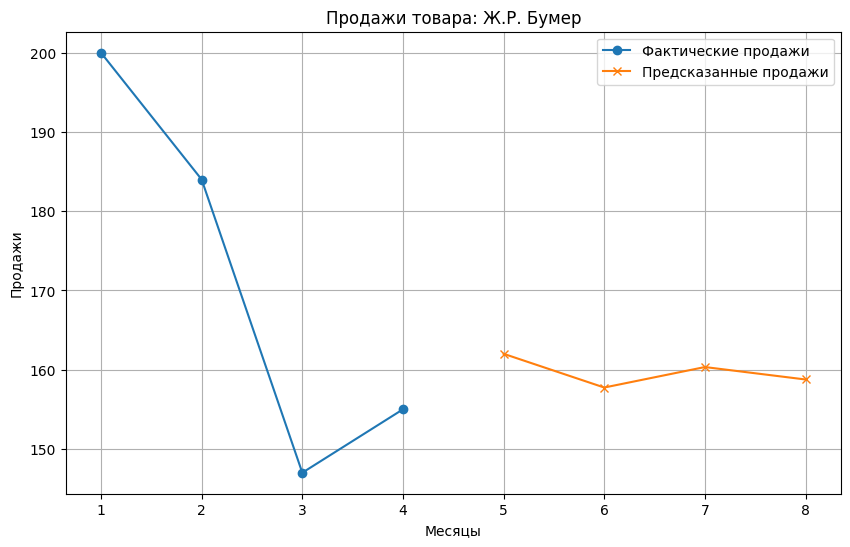

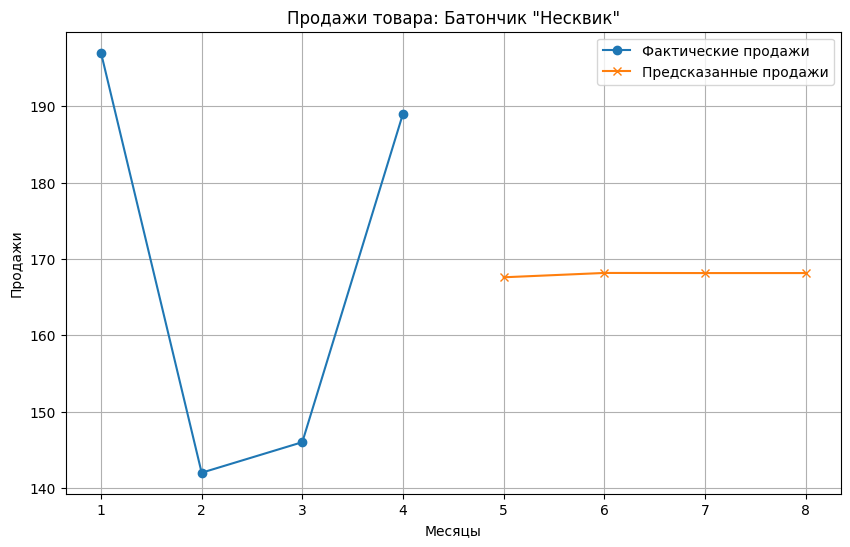

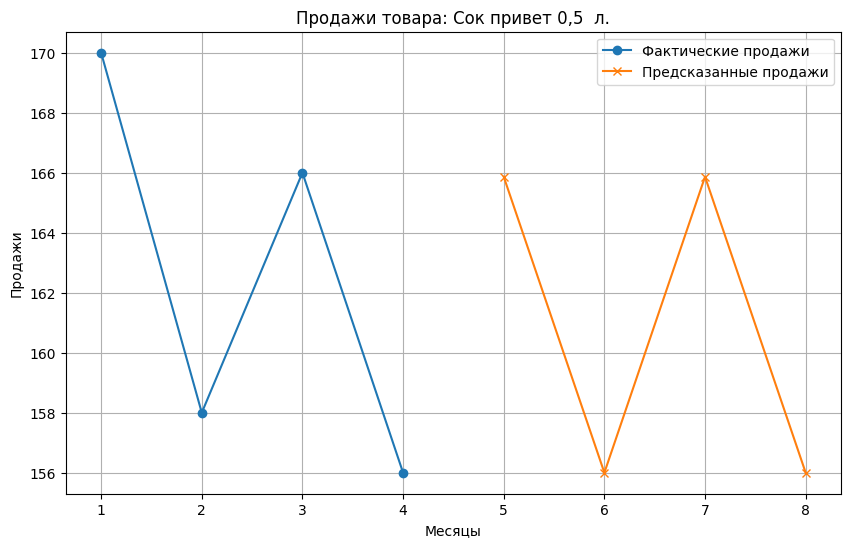

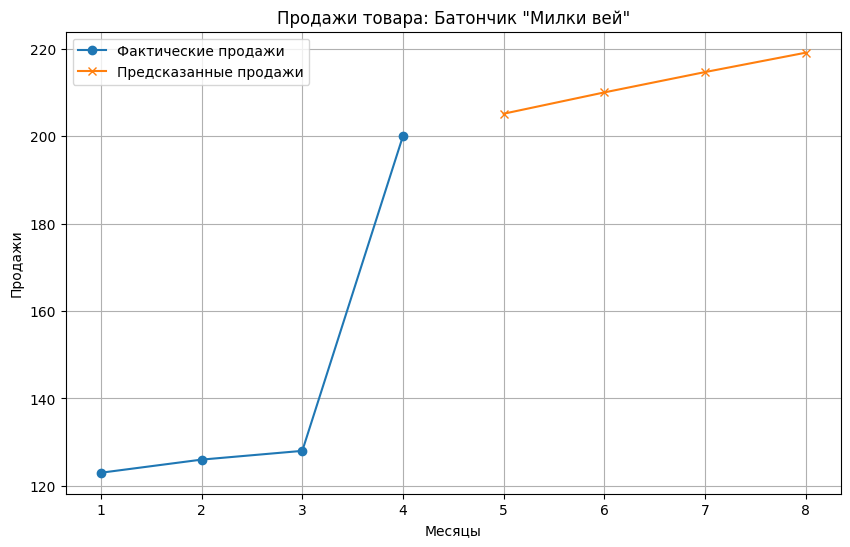

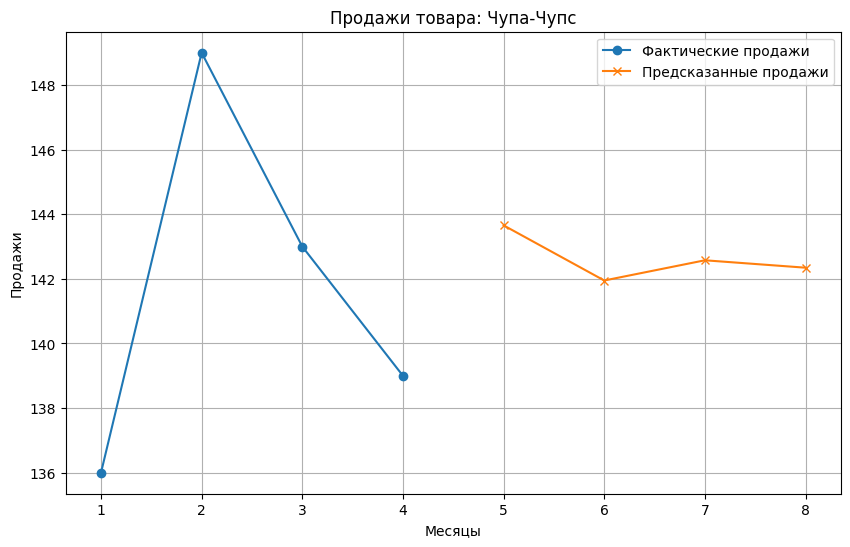

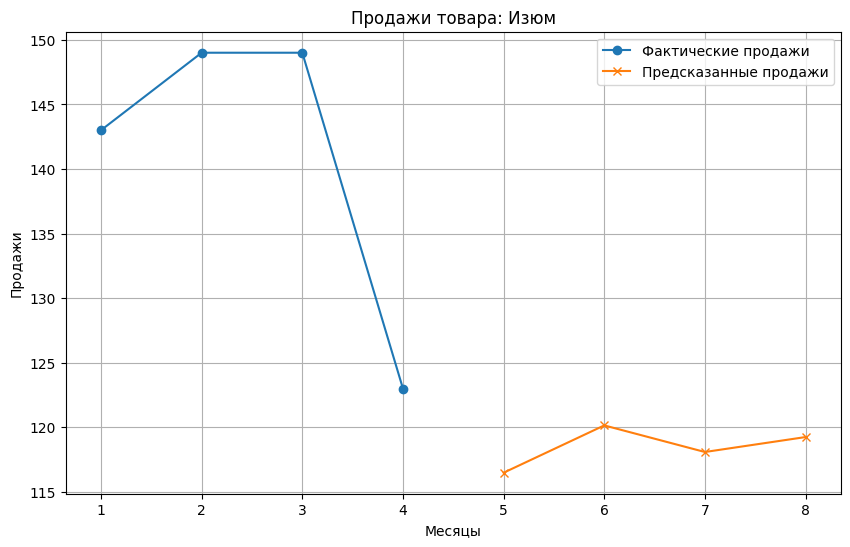

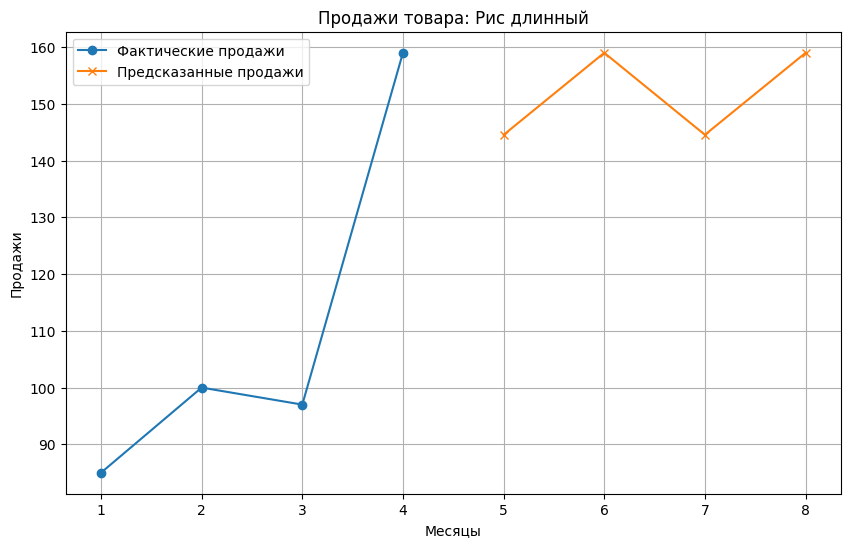

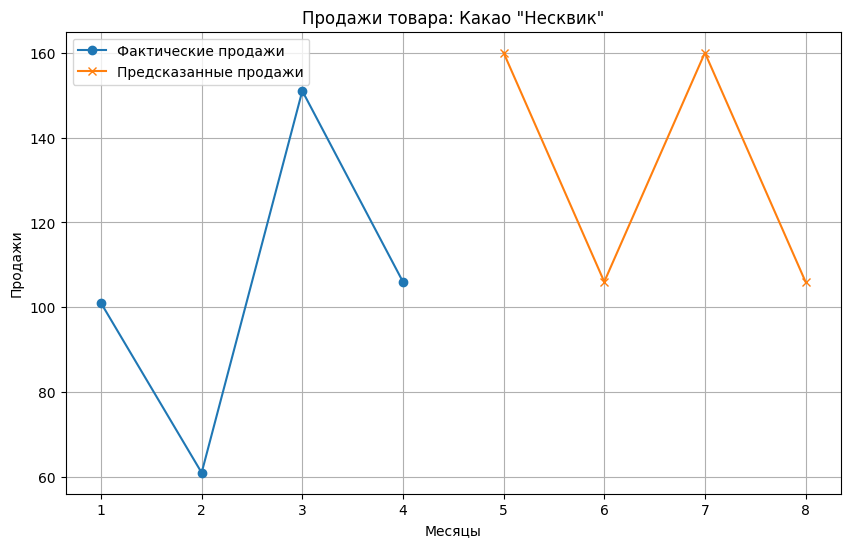

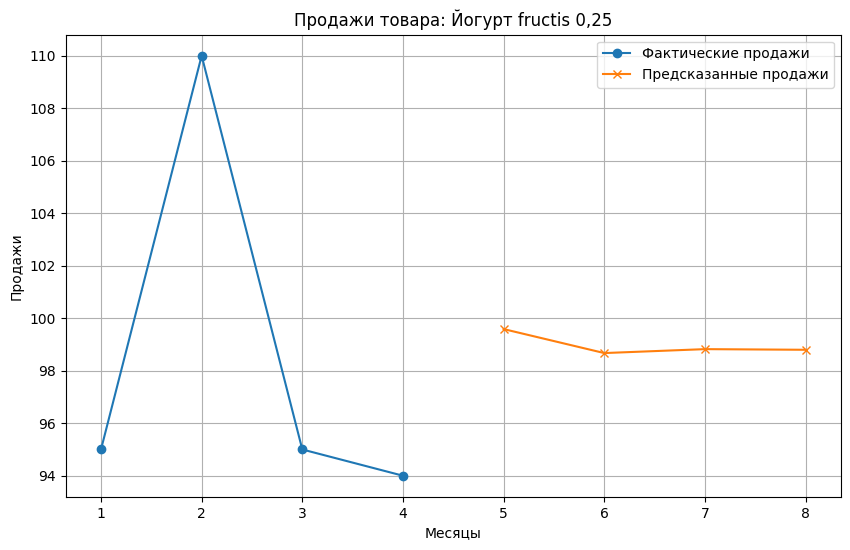

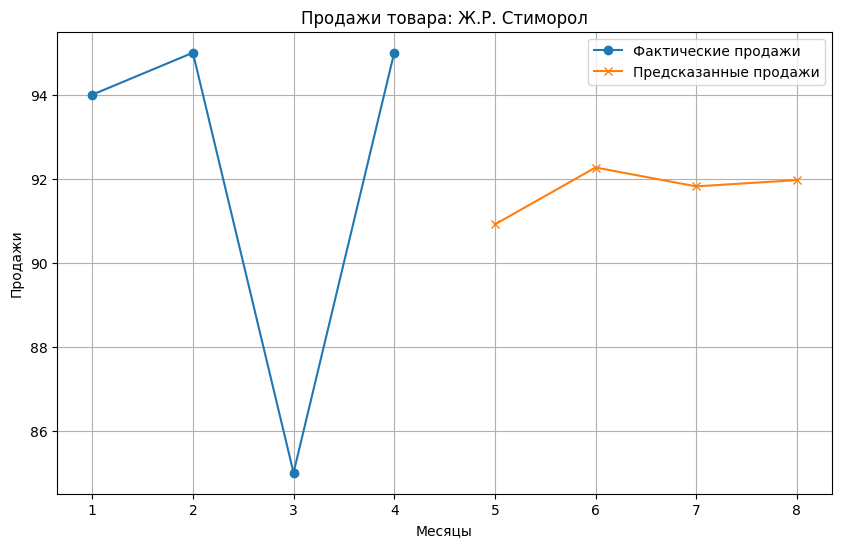

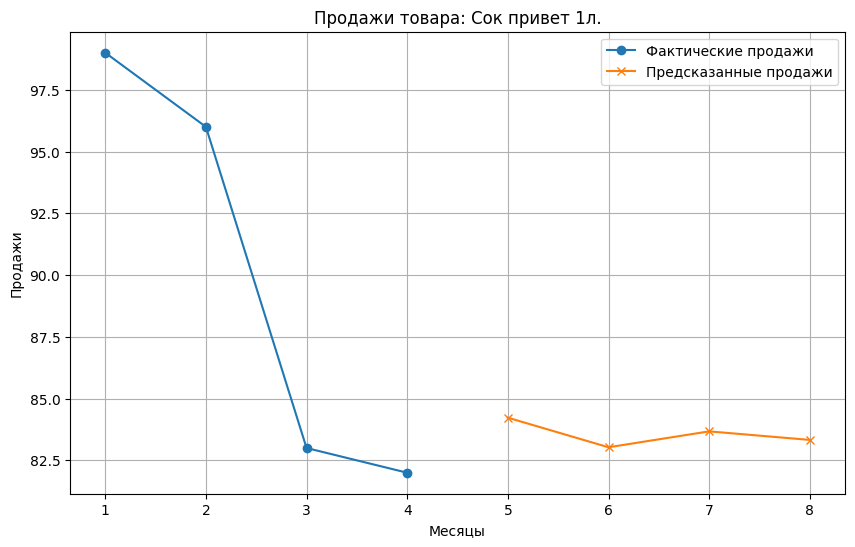

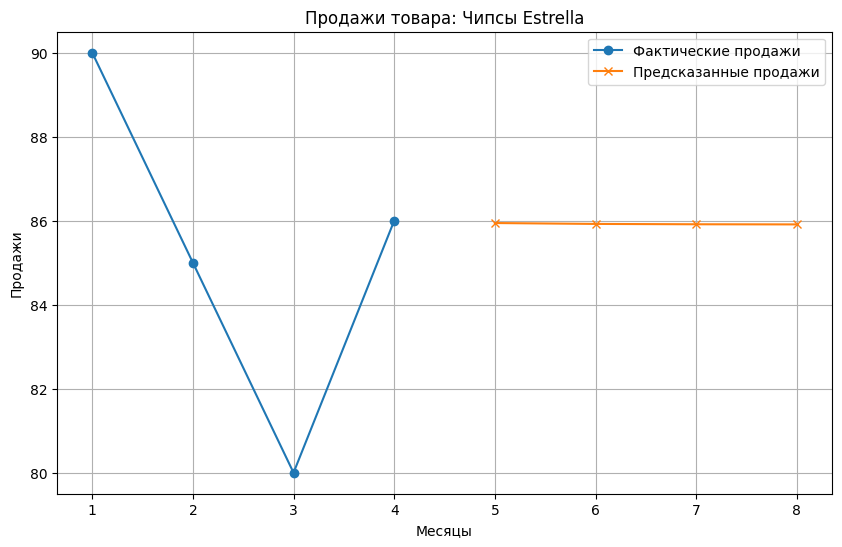

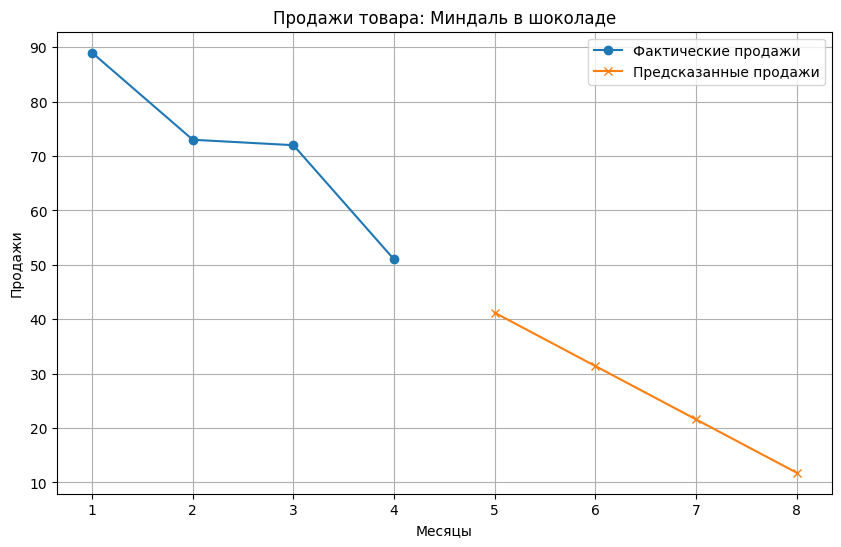

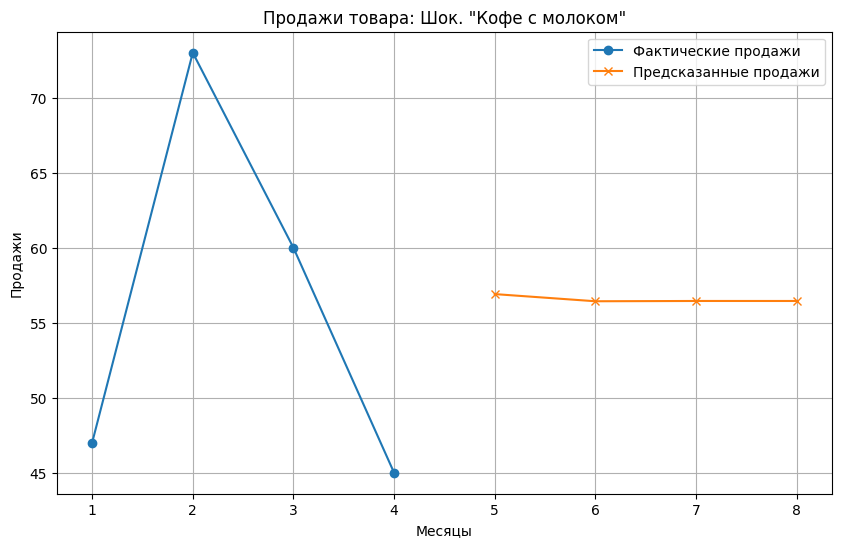

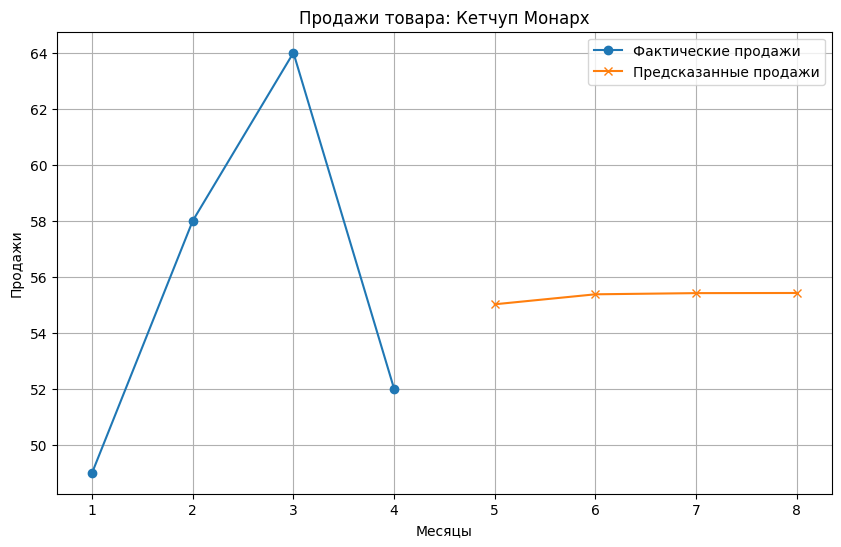

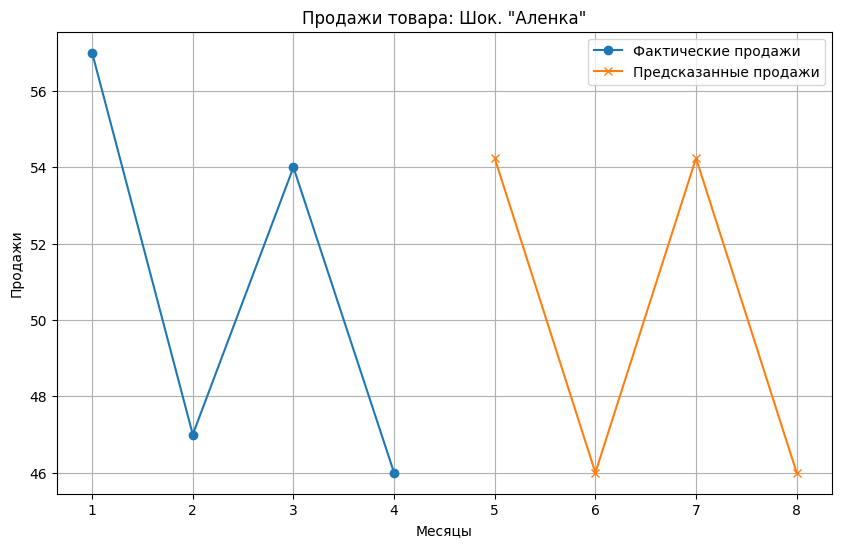

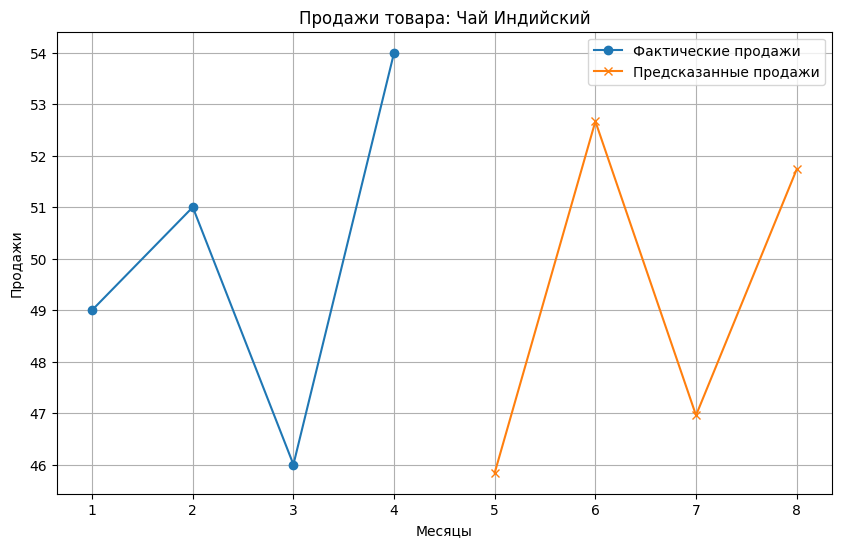

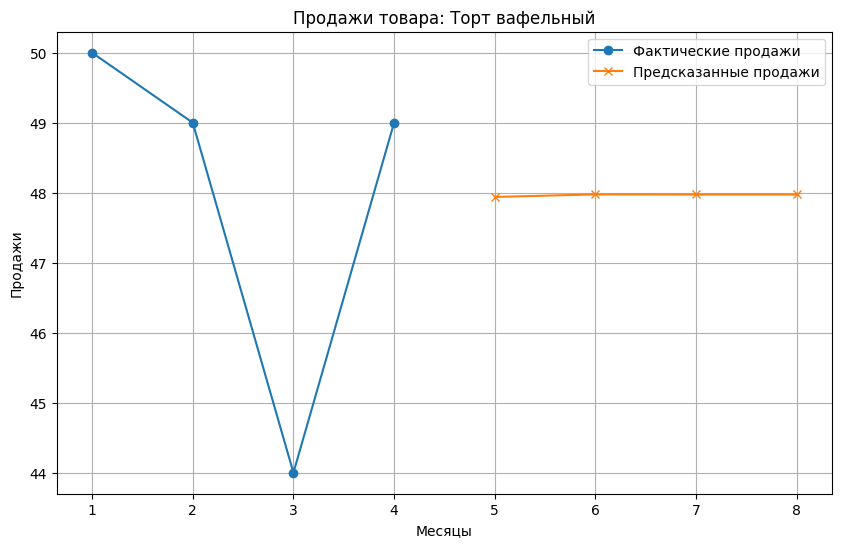

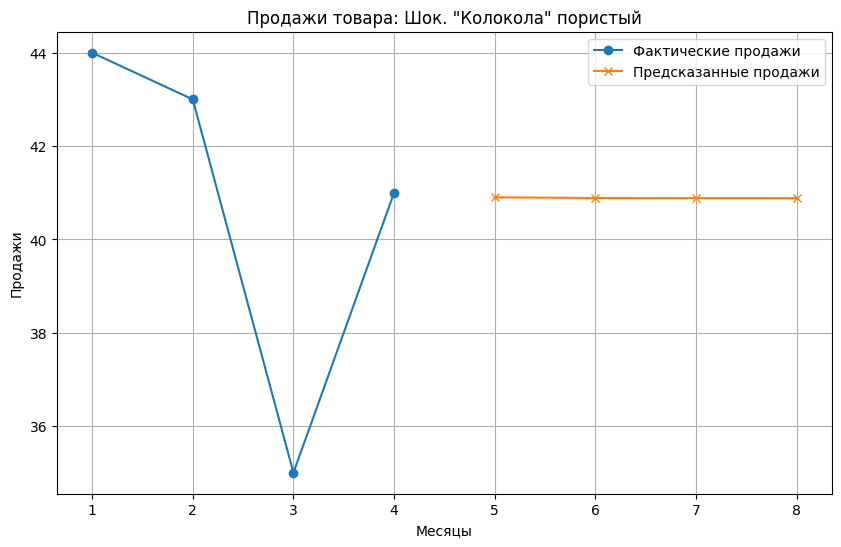

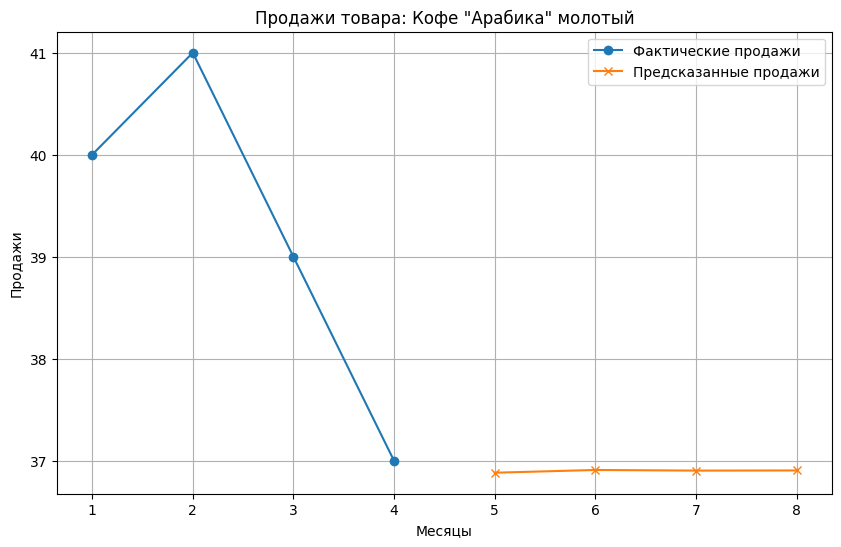

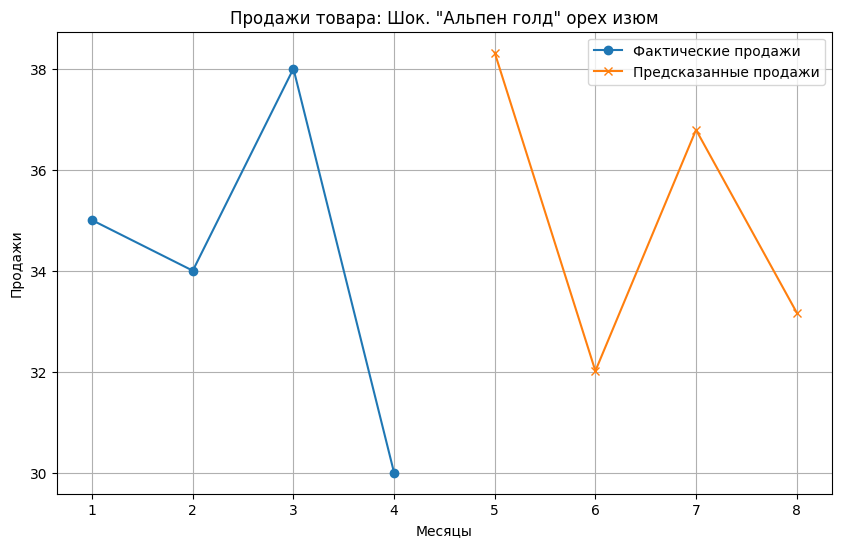

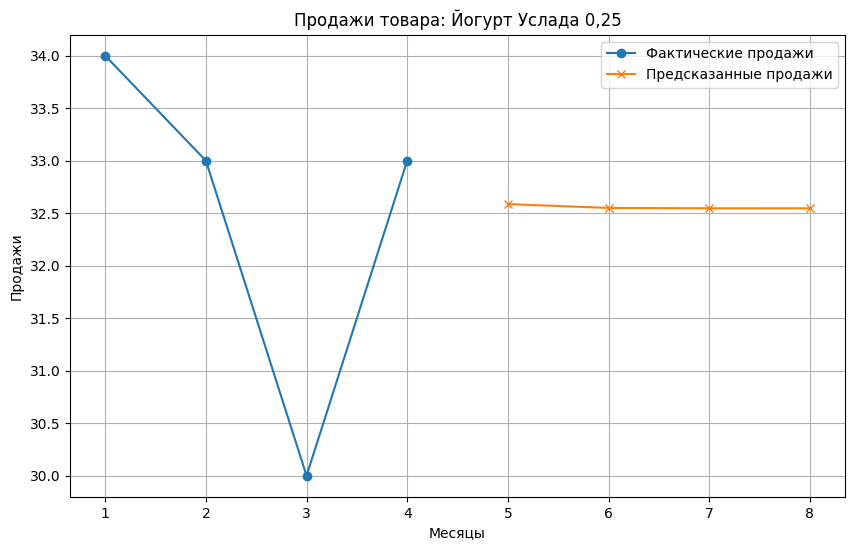

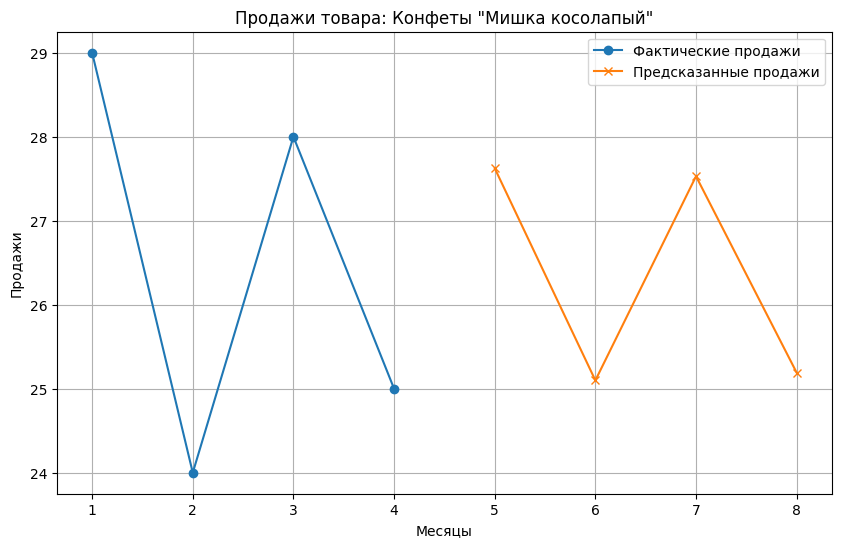

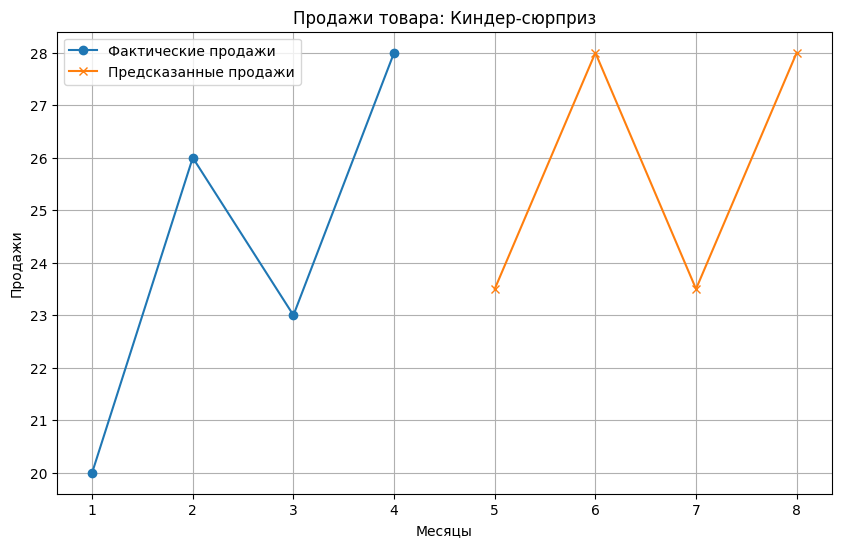

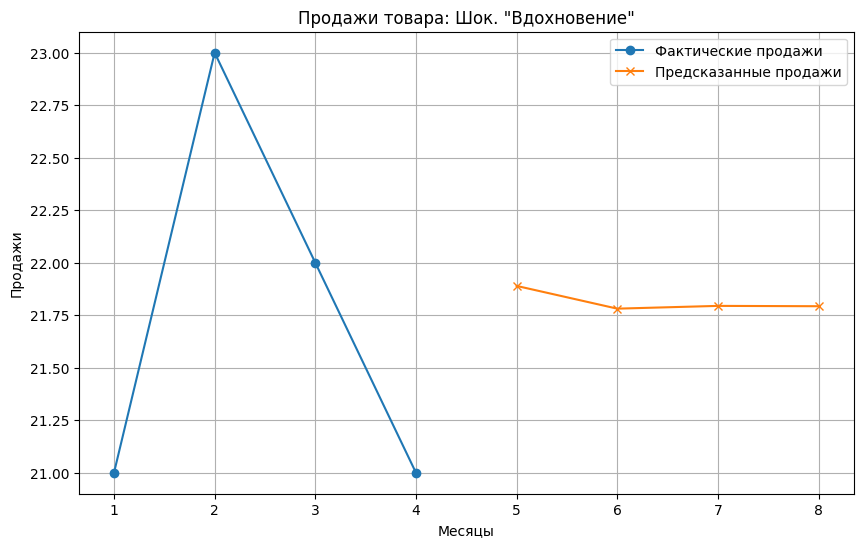

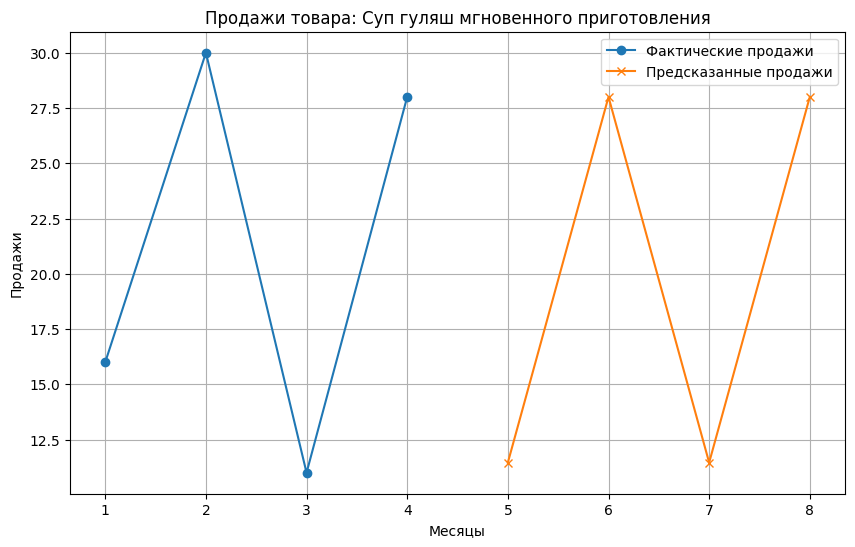

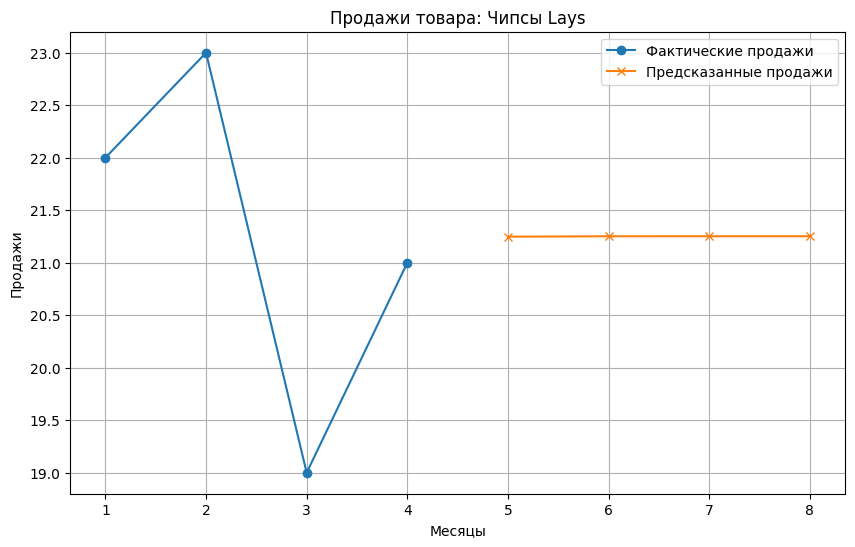

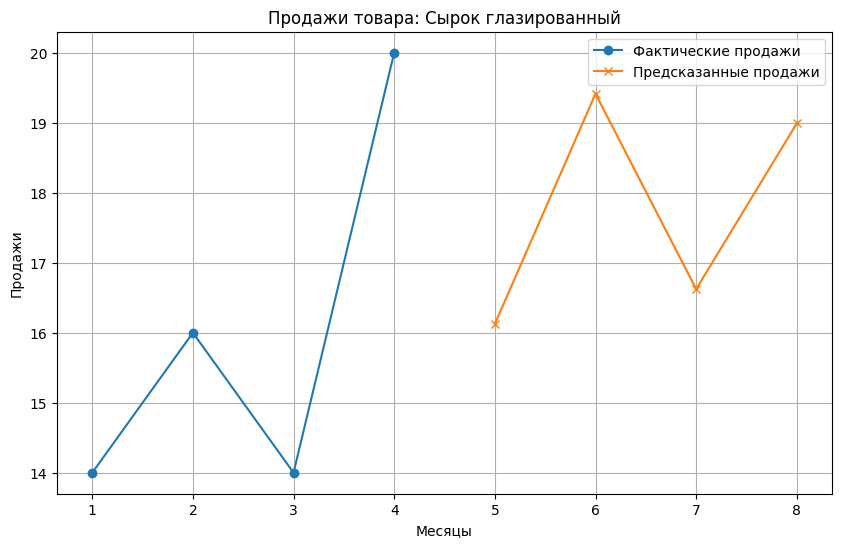

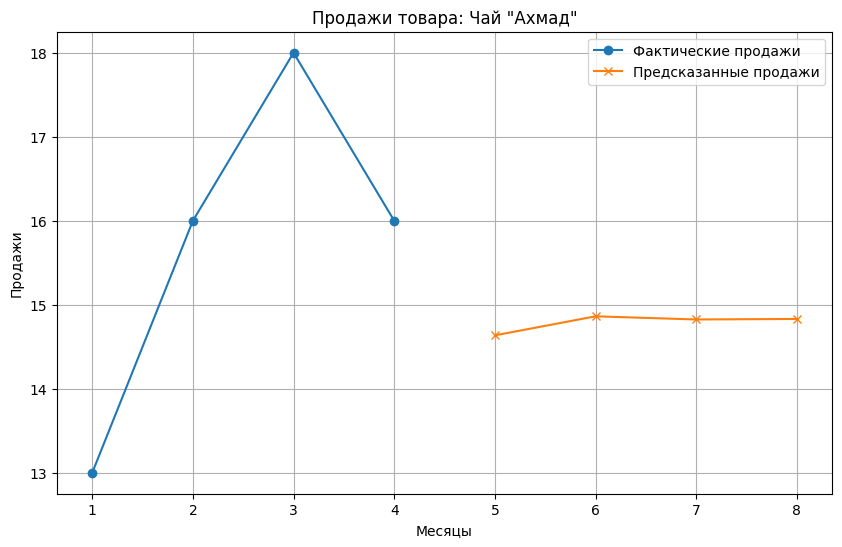

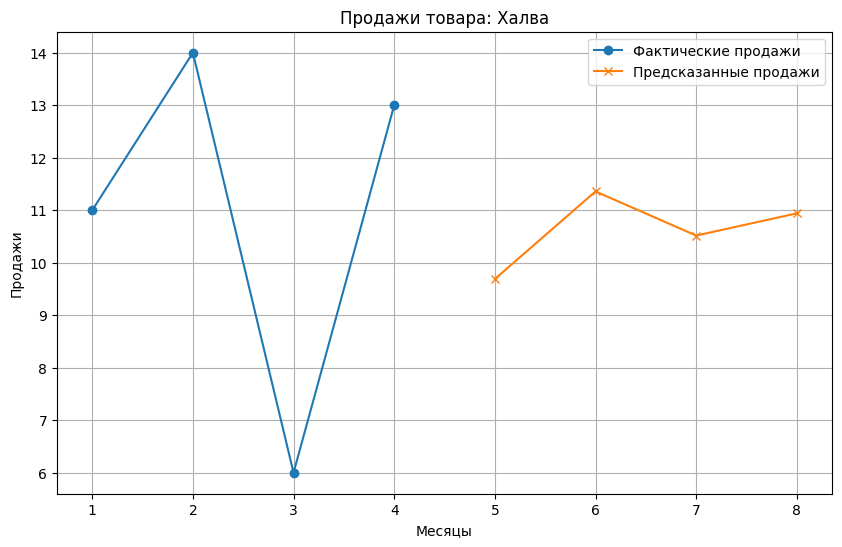

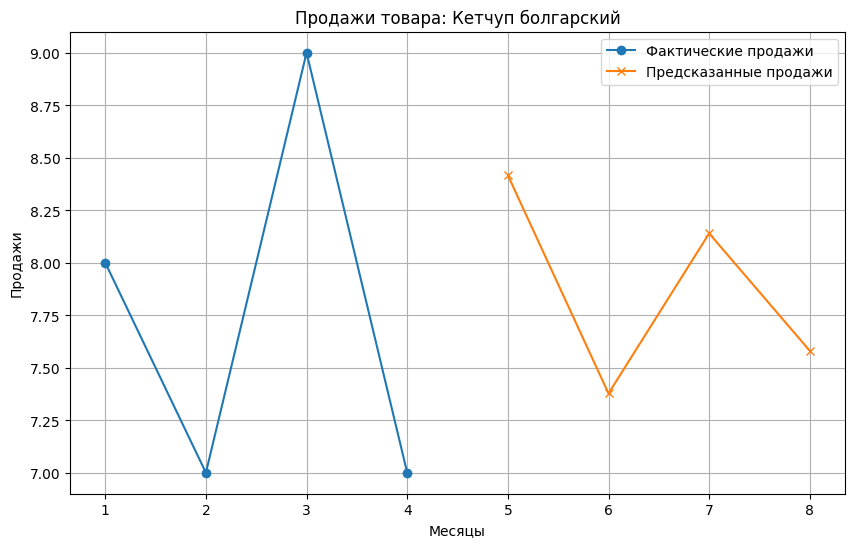

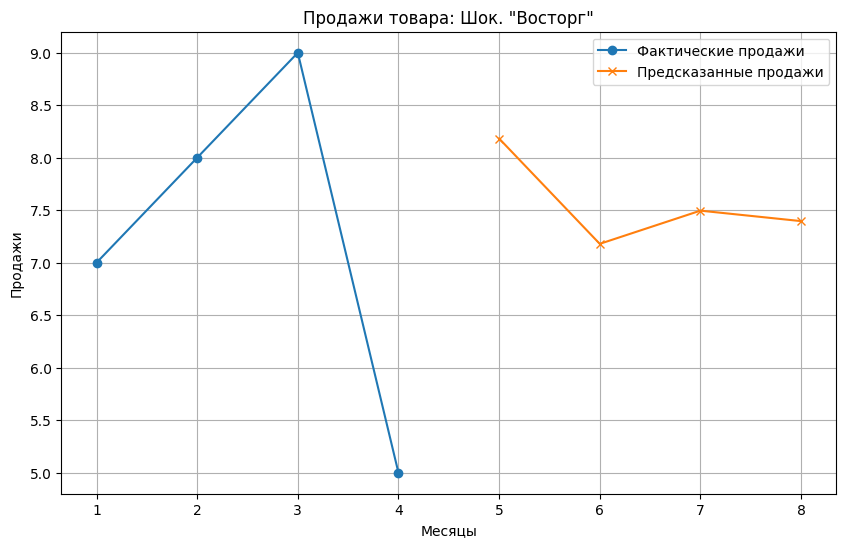

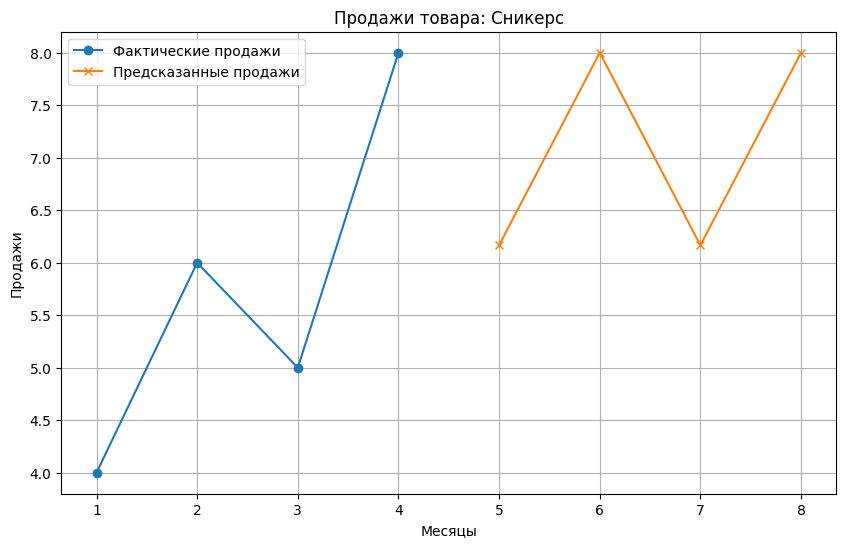

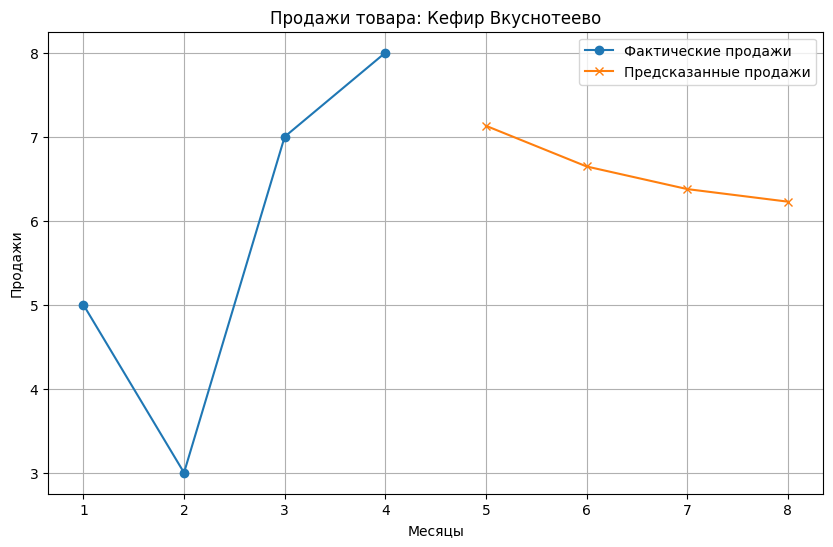

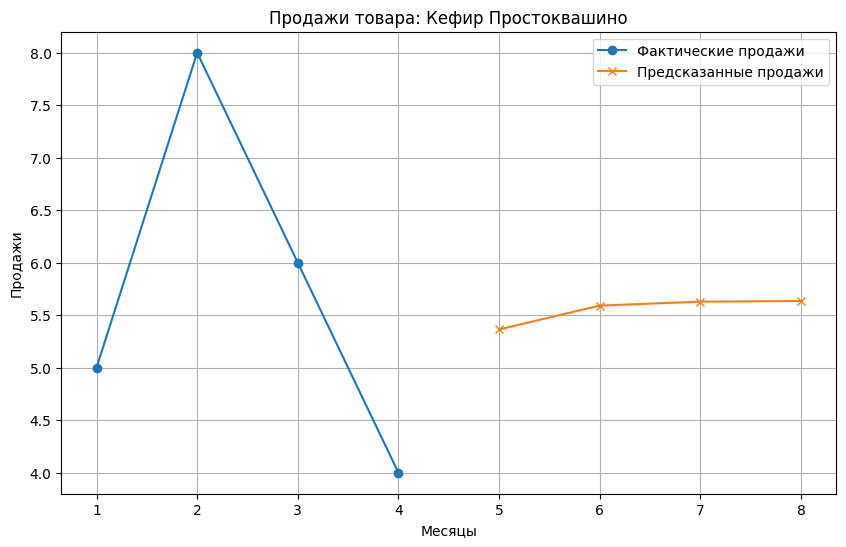

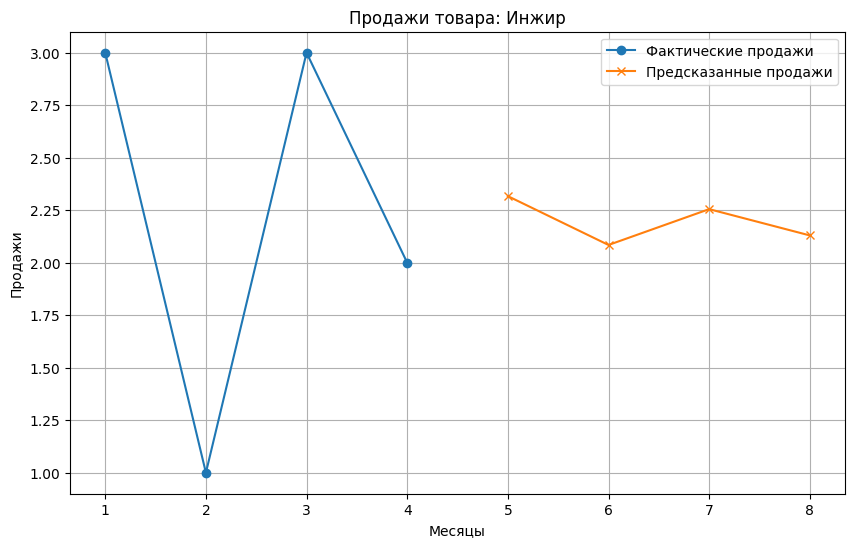

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
predicted_dar = pd.read_csv('/content/predicted_data.csv')

# Проверка данных
print(predicted_dar.head())

# Функция для построения графиков
def plot_predictions(data, product_name):
    product_data = data[data['товар'] == product_name]

    # Средние значения по столбцам '1', '2', '3', '4', '5', '6', '7', '8'
    actual_sales = product_data[['1', '2', '3', '4']].values.flatten()
    predicted_sales = product_data[['5', '6', '7', '8']].values.flatten()

    # Метки для осей
    months = ['1', '2', '3', '4', '5', '6', '7', '8']

    # Проверка на наличие предсказаний
    if len(predicted_sales) == 0:
        print(f"Нет предсказаний для товара: {product_name}")
        return

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(months[:4], actual_sales, label='Фактические продажи', marker='o')
    plt.plot(months[4:], predicted_sales, label='Предсказанные продажи', marker='x')
    plt.title(f'Продажи товара: {product_name}')
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи')
    plt.legend()
    plt.grid(True)
    plt.show()

# Построение графиков для каждого товара
for product_name in predicted_dar['товар'].unique():
    plot_predictions(predicted_dar, product_name)

    №                        товар  выручка     1     2     3     4  \
0   1              Батончик "Марс"     1927   514   510   431   472   
1  18  Кукурузные хлопья с сахаром     7493  1968  1818  1855  1852   
2  24       Сахар песок фасованный     3858   948   998   962   950   
3   7                   Ж.Р. Дирол     3286   804   788   831   863   
4   4             Батончик "Твикс"     2462   596   636   630   600   

   Unnamed: 7            5            6            7            8  
0    0.080472   479.951132   482.463609   483.257527   483.508397  
1    0.034890  1867.754312  1860.132835  1863.819883  1862.036197  
2    0.024026   969.435911   965.163879   966.102876   965.896483  
3    0.040010   860.195445   861.315796   860.868243   861.047029  
4    0.033177   616.000906   615.629587   615.638204   615.638004  


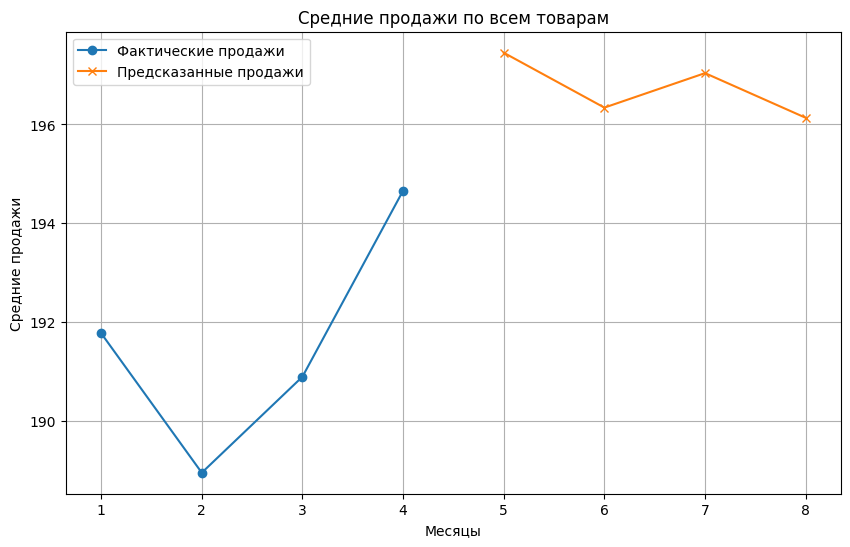

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
predicted_dar = pd.read_csv('/content/predicted_data.csv')

# Проверка данных
print(predicted_dar.head())

# Функция для построения общего графика
def plot_average_sales(data):
    # Средние значения по столбцам '1', '2', '3', '4', '5', '6', '7', '8'
    actual_sales = data[['1', '2', '3', '4']].mean().values
    predicted_sales = data[['5', '6', '7', '8']].mean().values

    # Метки для осей
    months = ['1', '2', '3', '4', '5', '6', '7', '8']

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(months[:4], actual_sales, label='Фактические продажи', marker='o')
    plt.plot(months[4:], predicted_sales, label='Предсказанные продажи', marker='x')
    plt.title('Средние продажи по всем товарам')
    plt.xlabel('Месяцы')
    plt.ylabel('Средние продажи')
    plt.legend()
    plt.grid(True)
    plt.show()

# Построение общего графика
plot_average_sales(predicted_dar)